In [ ]:
!pip install catboost
# if neceessary then uncomment it

# Importing necessary libraries for data manipulation and visualization

In [ ]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy import stats
from math import sqrt

# Importing visualization libraries and setting inline display for plots
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Importing functions for train/test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing functions for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Importing machine learning models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Importing additional metrics for model evaluation
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

# Importing preprocessing functions
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# More metrics for regression evaluation
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

# Importing XGBoost library
import os
# Setting path for MinGW compiler if necessary (commented out)
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # For plotting feature importance

# Importing joblib for model persistence
import joblib

# Setting Seaborn and Matplotlib styles for better visualization
sns.set()
plt.style.use('ggplot')
%matplotlib inline

# Importing additional preprocessing and pipeline utilities
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Importing additional regression models and ensemble methods
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb


**Upload Data Set**

In [ ]:
train_df = pd.read_csv('/content/Test Dataset.csv')
test_df = pd.read_csv('/content/Training Dataset.csv')

In [ ]:
train_df.columns

In [ ]:
test_df.columns

In [ ]:
train_df.describe()

In [ ]:
#find the object,int,float value
t = (train_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (train_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (train_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

In [ ]:
train_df.dtypes[train_df.dtypes != 'object']

In [ ]:
train_df.info()

In [ ]:
train_df['Loan_ID'] = train_df['Loan_ID'].astype(str)

# Extract numeric part from 'Loan_ID' using regex
train_df['Loan_ID'] = train_df['Loan_ID'].str.extract('(\d+)')

# Convert 'Loan_ID' to int64, handling possible NaN values
train_df['Loan_ID'] = pd.to_numeric(train_df['Loan_ID'], errors='coerce').astype('Int64')

# Verify the change
print(train_df.info())


In [ ]:
test_df['Loan_ID'] = test_df['Loan_ID'].astype(str)

# Extract numeric part from 'Loan_ID' using regex
test_df['Loan_ID'] = test_df['Loan_ID'].str.extract('(\d+)')

# Convert 'Loan_ID' to int64, handling possible NaN values
test_df['Loan_ID'] = pd.to_numeric(test_df['Loan_ID'], errors='coerce').astype('Int64')

# Verify the change
print(test_df.info())

In [ ]:
#find the missing value
print(train_df.isnull().sum())

In [ ]:
# List of features to plot against LoanAmount
features = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term',
    'Credit_History',
    'Dependents'
]

# List of colors for different features
colors = sns.color_palette('husl', len(features))

# Load your data (assuming the DataFrame is named 'train')
# train = pd.read_csv('path_to_your_train_data.csv')

# Create scatter plots
for feature, color in zip(features, colors):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x=feature, y='LoanAmount', color=color)
    plt.title(f'Scatter Plot of {feature} vs LoanAmount')
    plt.xlabel(feature)
    plt.ylabel('LoanAmount')
    plt.show()


In [ ]:
# Check for missing values
print("Missing Values Count:")
print(train_df.isnull().sum())

# Visualize missing values (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
import missingno as msno
msno.bar(train_df)

In [ ]:
msno.matrix(train_df)

In [ ]:
msno.heatmap(train_df)

In [ ]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Detailed EDA
*CAPTURE OF CATEGORICAL AND NUMERICAL VARIABLES*
This function identifies the names of categorical, numerical, and categorical but cardinal variables in the dataset.
Note: Numeric-looking categorical variables are also included in categorical variables.

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']  # Categorical columns
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']  # Numeric but categorical
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']  # Categorical but cardinal
    cat_cols += num_but_cat  # Combine categorical columns
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Exclude cardinal columns from categorical columns

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']  # Numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numeric-looking categories

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {cat_cols}')
    print('-' * 80)
    print(f'Numerical : {num_cols}')
    print('-' * 80)
    print(f'Categorical but Cardinal : {cat_but_car}')

cat_cols, num_cols, cat_but_car = grab_col_names(train_df, car_th=25)
identify_check(train_df)

# CATEGORICAL VARIABLES ANALYSIS
*Function to summarize and optionally plot categorical variables.*

In [ ]:
def to_analysis_cat(dataframe, c_cols, ratio=False, plot=False):
    print('-' * 80)
    if dataframe[c_cols].dtype == 'bool':
        dataframe[c_cols] = dataframe[c_cols].astype(int)

    if ratio:
        print(pd.DataFrame({c_cols: dataframe[c_cols].value_counts(),
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)}))
    print('-' * 80)
    if plot:
        values = dataframe[c_cols].value_counts()
        fig, axes = plt.subplots(1, len(values), figsize=(len(values) * 8, 9))

        for i, (index, value) in enumerate(values.items()):
            ax = axes[i]
            ax.pie([value, len(dataframe) - value], labels=[f'{index} ({value})', f'Others ({len(dataframe) - value})'],
                   colors=['#94bcfb', '#bad6fc', '#fffacd'], autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{c_cols} - {index}')
            ax.axis('equal')

        plt.suptitle(f'RATIO by {c_cols}', y=1.05, fontsize=20)
        plt.tight_layout()
        plt.show()

In [ ]:
for col in cat_cols:
    to_analysis_cat(train_df, col, ratio=True, plot=True)

# NUMERICAL VARIABLES ANALYSIS

In [ ]:
def to_analysis_num(dataframe, n_cols, bins=20, T=False, plot=False):
    if T:
        quantiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
        print(dataframe[n_cols].describe(percentiles=quantiles).T)

    if plot:
        num_cols = len(n_cols)
        fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(6 * num_cols, 6))

        if num_cols == 1:
            axs = [axs]  # Tek bir grafik için axs'i listeye dönüştür

        # Her bir sütun için grafik çizdir
        for i, col in enumerate(n_cols):
            # Histogram
            n, bins_hist, patches = axs[i].hist(dataframe[col],
                                                bins=bins, density=True,
                                                label=col, edgecolor='black',
                                                alpha=0.9, color='#bad6fc')
            #Density
            density = 1/(dataframe[col].std() * (2 * np.pi)**0.5) * \
                      np.exp(-(bins_hist - dataframe[col].mean())**2 / (2 * dataframe[col].std()**2))
            axs[i].plot(bins_hist, density, color='#b1cffc', linewidth=1, label='Density')

            axs[i].set_title(f'Distribution of {col} Variable')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency / Density')
            axs[i].legend(loc='upper right')
            axs[i].grid(axis='y')

        plt.tight_layout()
        plt.show()

                   count         mean          std     min      5%     25%  \
Loan_ID            367.0  2009.234332   584.577513  1015.0  1110.1  1484.5   
ApplicantIncome    367.0  4805.599455  4910.685399     0.0  1861.4  2864.0   
CoapplicantIncome  367.0  1569.577657  2334.232099     0.0     0.0     0.0   
LoanAmount         362.0   136.132597    61.366652    28.0   64.05  100.25   
Loan_Amount_Term   361.0   342.537396    65.156643     6.0   180.0   360.0   

                      50%     75%      95%       99%      max  
Loan_ID            2042.0  2509.5   2888.5   2972.36   2989.0  
ApplicantIncome    3786.0  5060.0  10000.0  20865.38  72529.0  
CoapplicantIncome  1025.0  2430.5   4335.6  12453.78  24000.0  
LoanAmount          125.0   158.0   239.75     371.7    550.0  
Loan_Amount_Term    360.0   360.0    360.0     480.0    480.0  


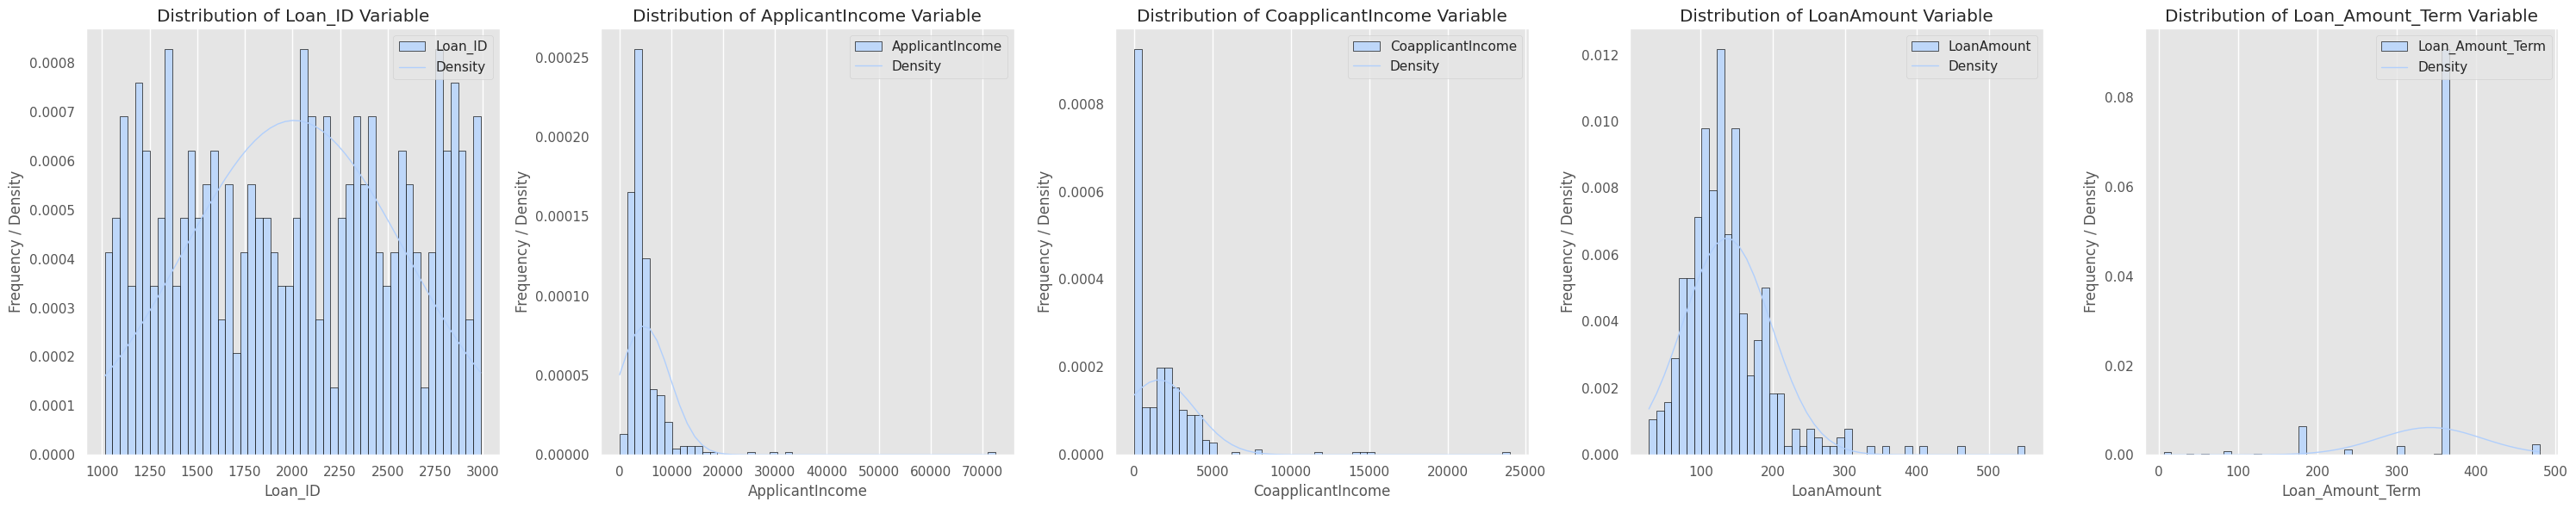

In [276]:
num_cols = [col for col in num_cols if 'SalePrice' not in col]
to_analysis_num(train_df, num_cols, bins=50, T=True, plot=True)

# TARGET VARIABLES ANALYSIS
Analysis of Categorical Variables by Target
Function to compare the means, ratio, count of categorical variables by the target variable.

In [277]:
def cat_by_target(dataframe, target, c_cols, plot=False):

    cat_tar = pd.DataFrame({'Target Mean': dataframe.groupby(c_cols)[target].mean(),
                            'Count': dataframe[c_cols].value_counts(),
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)})

    print('-' * 80)
    print(c_cols)
    print('-' * 80)
    print(cat_tar, end='\n\n\n')

    if plot:
        colors = ['#6c94dc','#b1cffc', '#94bcfb', '#c4dcfc']
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Hedef Değişken Ortalaması için Bar Plot
        values = dataframe[c_cols].value_counts()
        sns.barplot(x=cat_tar.index, y=cat_tar['Target Mean'],palette=colors[:len(cat_tar)], ax=ax1)
        ax1.set_title(f'Target Mean by {c_cols}')
        ax1.set_ylabel('Target Mean')
        ax1.tick_params(axis='x', rotation=30)

        # Kategorik Değişken Dağılımı için Pie Chart
        ax2.pie(x=cat_tar['Count'], labels=cat_tar.index, startangle=90, colors=colors[:len(values)])
        ax2.set_title(f'Ratio by {c_cols}')
        ax2.legend(labels=[f'{index} - {row["Ratio (%)"]:.2f}%'for index, row in cat_tar.iterrows()],
                   loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout()
        plt.show()

In [278]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    Int64  
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: Int64(1), float64(4), int64(1), object(7)
memory usage: 63.1+ KB


# Analysis of Numerical Variables by Target
Function to compare the means of numerical columns by the target variable.

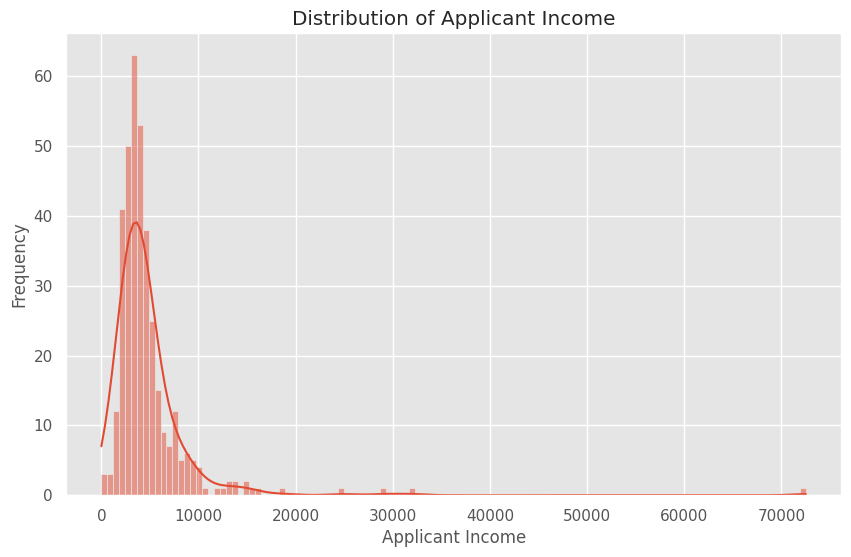

In [279]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# OUTLIER ANALYSIS AND REMOVAL
Function to calculate outlier thresholds.

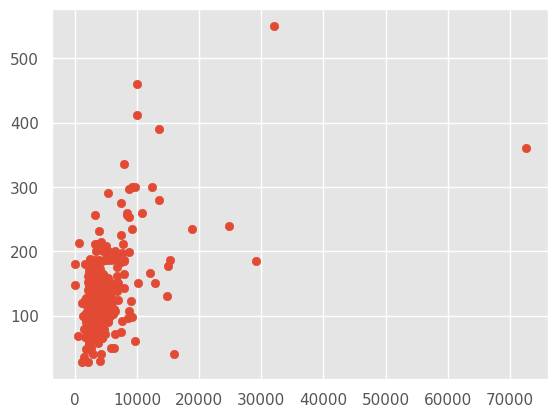

In [280]:
plt.scatter(x='ApplicantIncome', y='LoanAmount', data=train_df)


In [281]:
train_df.query('ApplicantIncome > 40000 ')
#LP001428,LP001791
train_df.query('LoanAmount > 400 ')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
143,1791,Male,Yes,0,Graduate,Yes,32000,0,550.0,360.0,NaN,Semiurban
194,2077,Male,Yes,1,Graduate,No,10000,2690,412.0,360.0,1.0,Semiurban
284,2570,Female,Yes,2,Graduate,No,10000,11666,460.0,360.0,1.0,Urban


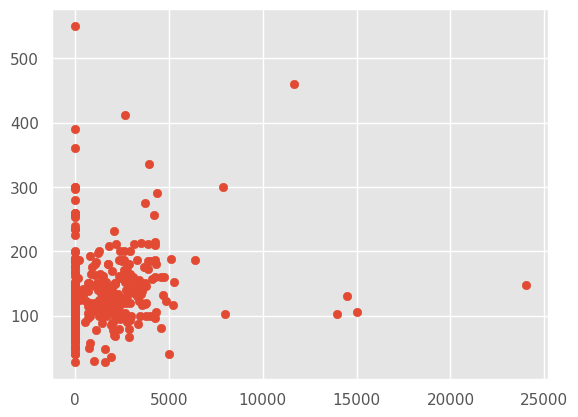

In [282]:
plt.scatter(x='CoapplicantIncome', y='LoanAmount', data=train_df)


In [283]:
train_df.query( 'CoapplicantIncome > 16000 or LoanAmount > 400')
#LP001791 ,LP001153

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural
143,1791,Male,Yes,0,Graduate,Yes,32000,0,550.0,360.0,NaN,Semiurban
194,2077,Male,Yes,1,Graduate,No,10000,2690,412.0,360.0,1.0,Semiurban
284,2570,Female,Yes,2,Graduate,No,10000,11666,460.0,360.0,1.0,Urban


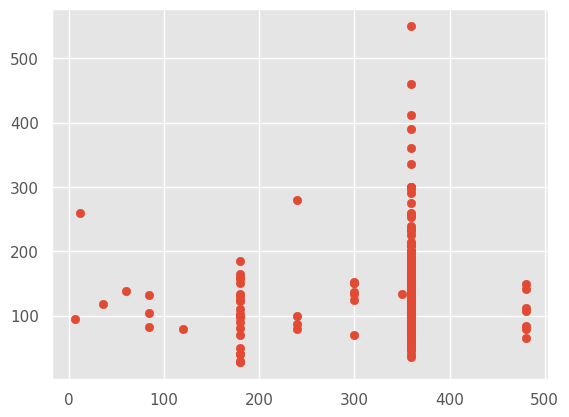

In [284]:
plt.scatter(x='Loan_Amount_Term', y='LoanAmount', data=train_df)

In [285]:
train_df.query('Loan_Amount_Term > 1 &  Loan_Amount_Term < 15')
#maybe LP001794


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
144,1794,Male,Yes,2,Graduate,Yes,10890,0,260.0,12.0,1.0,Rural
325,2802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban


In [286]:
train_df.query('Loan_Amount_Term > 200 &  Loan_Amount_Term < 300')
#LP001059

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,1059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
141,1787,Male,Yes,3+,Graduate,No,3089,2999,100.0,240.0,1.0,Rural
164,1921,Male,No,1,Graduate,No,3180,2370,80.0,240.0,NaN,Rural
338,2857,Male,Yes,1,Graduate,Yes,2360,3355,87.0,240.0,1.0,Rural


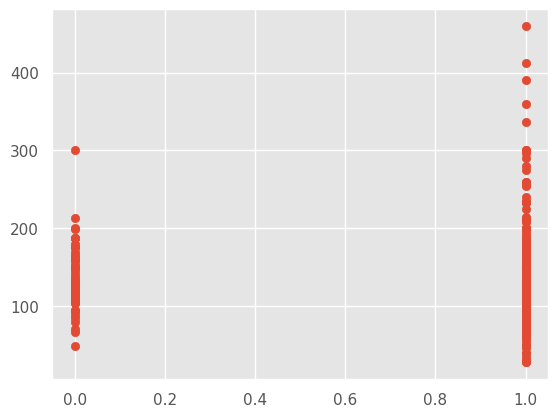

In [287]:
plt.scatter(x='Credit_History', y='LoanAmount', data=train_df)

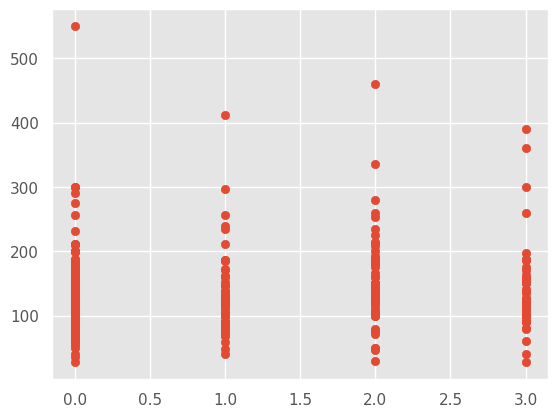

In [288]:
# Convert Dependents to numeric, treating '3+' as 3 and handling missing values
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(float)
plt.scatter(x='Dependents', y='LoanAmount', data=train_df)

In [289]:
train_df.query('Dependents == 0.0 & LoanAmount > 400')
	#LP001791


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
143,1791,Male,Yes,0.0,Graduate,Yes,32000,0,550.0,360.0,NaN,Semiurban


Removal of Outlier AND replaces the NULL values with a specified value

In [290]:
values = [ 1791, 1794, 1153 ,1428, 1059]

In [291]:
#Remove the values which has seen in scatter plot
train_df = train_df[train_df.Loan_ID.isin(values) == False]

In [292]:
#sorting the null values
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
Credit_History,28
Self_Employed,22
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5
Loan_ID,0
Married,0
Education,0
ApplicantIncome,0


In [293]:
train_df['Credit_History'].unique()

array([ 1., nan,  0.])

 any missing (NaN) values are being replaced with the string 'No'

In [294]:
train_df['Credit_History'].fillna('No', inplace=True)
test_df['Credit_History'].fillna('No', inplace=True)

In [295]:
train_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [296]:
# any missing (NaN) values are being replaced with the string 'No'
train_df['Self_Employed'].fillna('No', inplace=True)
test_df['Self_Employed'].fillna('No', inplace=True)

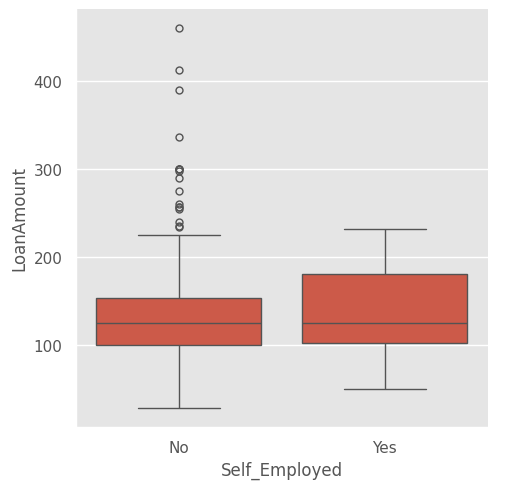

In [297]:
sns.catplot(data=train_df, x="Self_Employed", y="LoanAmount", kind="box")

In [298]:
train_df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [299]:
train_df['Dependents'].fillna('No', inplace=True)
test_df['Dependents'].fillna('No', inplace=True)

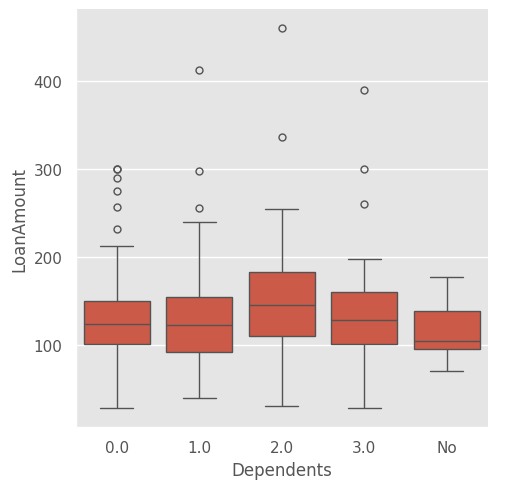

In [300]:
sns.catplot(data=train_df, x="Dependents", y="LoanAmount", kind="box")

In [301]:
train_df['Loan_Amount_Term'].unique()

array([360., 180.,  nan,  60., 480.,  84., 240., 300., 350.,  36., 120.,
         6.])

In [302]:
train_df['Loan_Amount_Term'].fillna('No', inplace=True)
test_df['Loan_Amount_Term'].fillna('No', inplace=True)


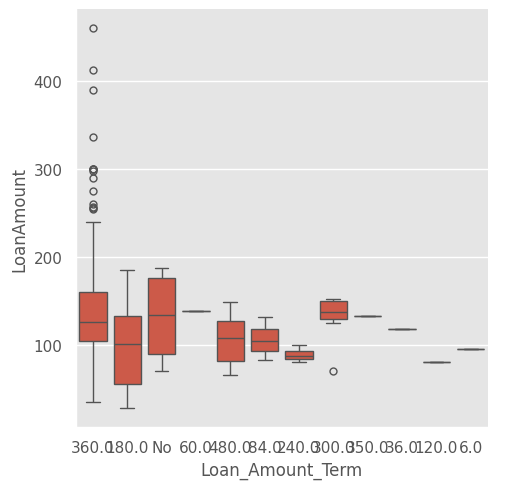

In [303]:
sns.catplot(data=train_df, x="Loan_Amount_Term", y="LoanAmount", kind="box")

In [304]:

# Impute Credit_History with mode
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

# Impute Self_Employed with mode
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

# Impute Gender with mode
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)

# Impute Dependents with mode
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)

# Impute Loan_Amount_Term with mode
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)




In [305]:
# Verify no remaining missing values
print(train_df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [306]:
# Impute missing values in test_df
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
# Verify no remaining missing values
print(test_df.isnull().sum())

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [307]:
if 'Self_Employed' in train_df.columns:
    print("Column 'Self_Employed' is present in the DataFrame.")
else:
    print("Column 'Self_Employed' is not present in the DataFrame.")


Column 'Self_Employed' is present in the DataFrame.


In [308]:
train_df = train_df.drop(columns=['Credit_History','Gender','Dependents'])
test_df = test_df.drop(columns=['Credit_History','Self_Employed','Gender','Dependents'])

In [309]:
if 'Self_Employed' in train_df.columns:
    print("Column 'Self_Employed' is present in the DataFrame.")
    train_df = train_df.drop(columns=['Self_Employed'])
else:
    print("Column 'Self_Employed' is not present in the DataFrame.")

Column 'Self_Employed' is present in the DataFrame.


# Feature Engineering

In [310]:
# Create TotalIncome feature
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [311]:
# Create Income to Loan Amount Ratio
train_df['Income_Loan_Ratio'] = train_df['TotalIncome'] / train_df['LoanAmount']
test_df['Income_Loan_Ratio'] = test_df['TotalIncome'] / test_df['LoanAmount']

                    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID            1.000000         0.076875           0.033230   -0.052033   
ApplicantIncome    0.076875         1.000000          -0.084381    0.421152   
CoapplicantIncome  0.033230        -0.084381           1.000000    0.222778   
LoanAmount        -0.052033         0.421152           0.222778    1.000000   
TotalIncome        0.085807         0.817754           0.504513    0.492659   
Income_Loan_Ratio  0.103562         0.429731           0.335811   -0.250537   

                   TotalIncome  Income_Loan_Ratio  
Loan_ID               0.085807           0.103562  
ApplicantIncome       0.817754           0.429731  
CoapplicantIncome     0.504513           0.335811  
LoanAmount            0.492659          -0.250537  
TotalIncome           1.000000           0.565824  
Income_Loan_Ratio     0.565824           1.000000  


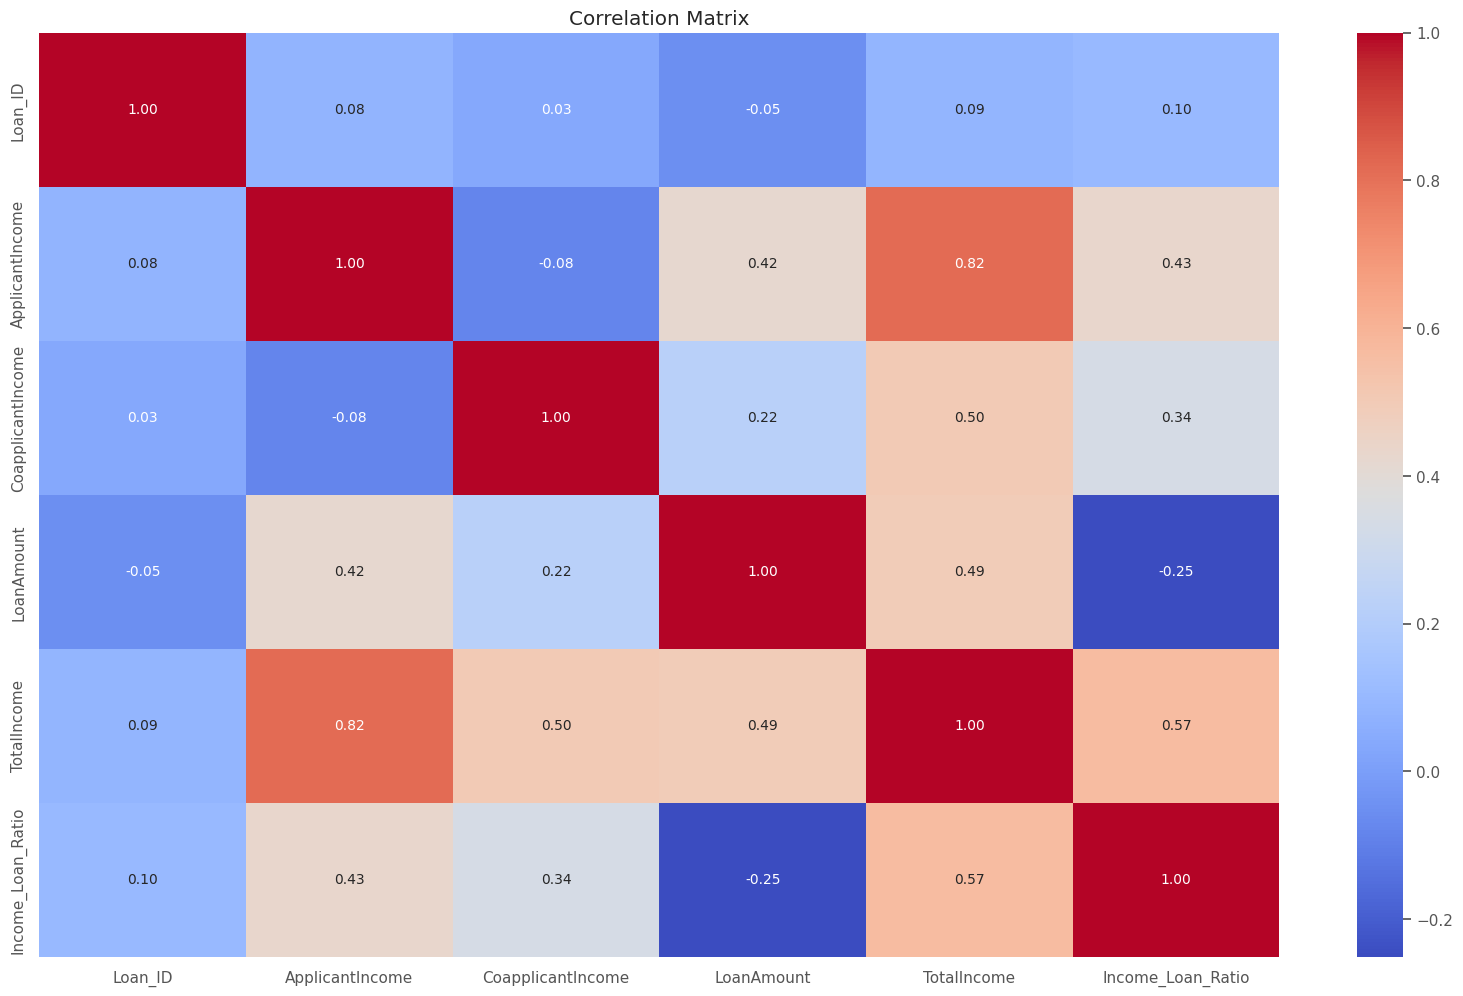

In [312]:
corr_matrix = train_df.corr(numeric_only=True)

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Count'>

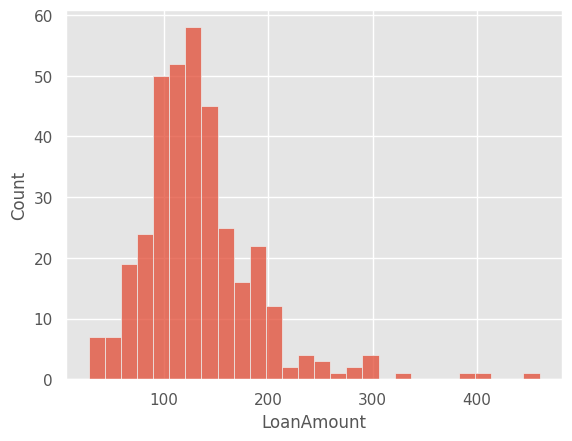

In [313]:
sns.histplot(
    train_df,
    x=train_df['LoanAmount']
)

In [314]:
#log function used to reduce skewness,handling outliers,linear relationship
train_df['LoanAmount'] = np.log1p(train_df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

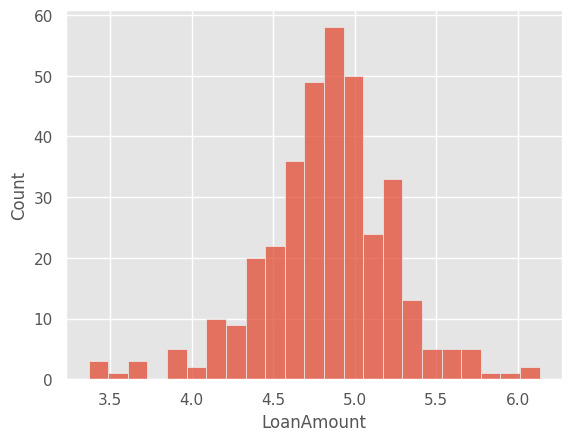

In [315]:
sns.histplot(
    train_df,
    x=train_df['LoanAmount']
)

In [316]:
train_df.dtypes[train_df.dtypes=='object']
test_df.dtypes[test_df.dtypes=='object']

Married             object
Education           object
Loan_Amount_Term    object
Property_Area       object
Loan_Status         object
dtype: object

In [317]:
train_df.dtypes[train_df.dtypes !='object']
test_df.dtypes[test_df.dtypes !='object']

Loan_ID                Int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
TotalIncome          float64
Income_Loan_Ratio    float64
dtype: object

# Data Preprocesssing,

One-hot encoding and ordinal encoding are techniques used to convert categorical data into numerical form for machine learning models. For instance, consider a dataset with a feature "Size" having categories ["Small", "Medium", "Large"]. Using one-hot encoding, we create three binary columns: "Small" becomes [1, 0, 0], "Medium" becomes [0, 1, 0], and "Large" becomes [0, 0, 1], effectively capturing each category's presence without implying any order. Conversely, ordinal encoding assigns each category a unique integer based on their natural order: "Small" becomes 1, "Medium" becomes 2, and "Large" becomes 3. This method is efficient in memory usage and computation but assumes a linear relationship among categories, which is appropriate for ordinal data like size but not for nominal data without inherent order, such as colors. Thus, one-hot encoding is preferable for non-ordered categories, while ordinal encoding suits naturally ordered data.

In [318]:
# Ordinal coding: ordinal encoding or integer encoding) is a technique used to convert categorical variables into numerical values.

In [319]:
#One hot encoding is a technique used in machine learning to
#convert categorical data into a numerical format that can be used by algorithms. This encoding creates binary (0 or 1) columns for each category in the original data,
# ensuring that no ordinal relationships are implied between the categories.
# Columns for one-hot encoding

In [320]:
ode_cols = ['Education', 'Loan_Amount_Term']
ohe_cols = ['Married', 'Property_Area']

In [321]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('LoanAmount')

In [322]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [323]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [324]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [325]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough'
)

In [326]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

# Data Splitting

In [327]:
X = train_df.drop('LoanAmount', axis=1)
y = train_df['LoanAmount']

In [328]:
print(X.dtypes)


Loan_ID                Int64
Married               object
Education             object
ApplicantIncome        int64
CoapplicantIncome      int64
Loan_Amount_Term      object
Property_Area         object
TotalIncome            int64
Income_Loan_Ratio    float64
dtype: object


In [329]:
# Check unique values in each column
for col in X.columns:
    unique_types = set(type(value) for value in X[col].dropna())
    if len(unique_types) > 1:
        print(f"Column '{col}' has mixed types: {unique_types}")


Column 'Loan_Amount_Term' has mixed types: {<class 'str'>, <class 'float'>}


In [330]:
X['Loan_Amount_Term'] = X['Loan_Amount_Term'].astype(str)


In [331]:
X_preprocessed = pipeline.fit_transform(X)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [333]:
print(X.shape, X_train.shape, X_test.shape)

(362, 9) (289, 12) (73, 12)


In [334]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

4
1


In [335]:
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())


## LinearRegression

Mean Absolute Error:  0.17029738393239344
Mean Squared Error:  0.053509597855277174
Root Mean Squared Error:  0.2313214167674
R² on Test data:  0.6734841655957938


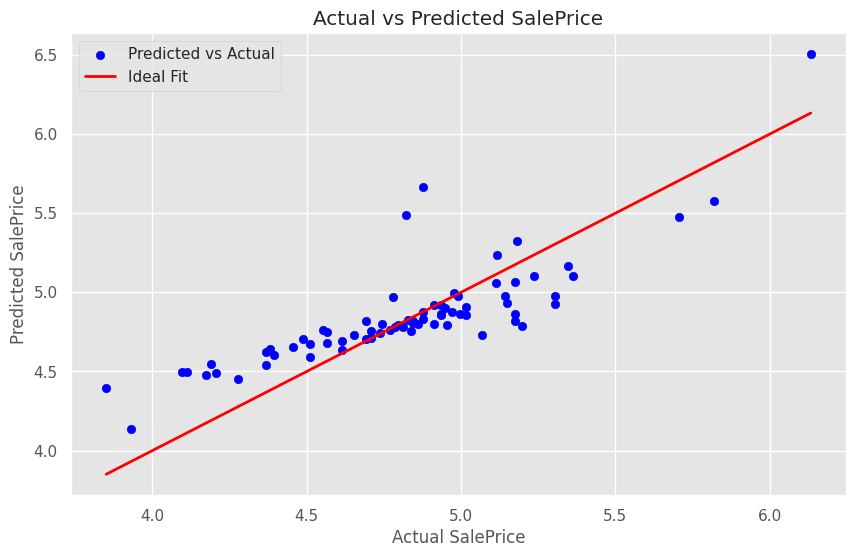

In [336]:
lr = LinearRegression()
lr.fit(X_train, y_train)

X_test_prediction = lr.predict(X_test)

# mean absolute error for test data
mae = mean_absolute_error(y_test, X_test_prediction)
print('Mean Absolute Error: ', mae)

#mean Square error for test data
mse=mean_squared_error(y_test, X_test_prediction)
print('Mean Squared Error: ', mse)

#root mean square error for test data
rmse=np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

# R² score on test data
test_data_r2 = r2_score(y_test, X_test_prediction)
print('R² on Test data: ', test_data_r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test_prediction, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## KNN model

Best parameters for KNN:  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score for KNN:  -0.08788955485037535
Best RMSE for KNN:  0.296461725776491

Training Data Metrics for KNN:
Mean Absolute Error:  1.1298043654031402e-09
Mean Squared Error:  1.3538112807131677e-16
Root Mean Squared Error:  1.1635339619938766e-08
R2 Score:  0.9999999999999991

Test Data Metrics for KNN:
Mean Absolute Error:  0.23844863799725488
Mean Squared Error:  0.09081874550552997
Root Mean Squared Error:  0.30136148643370136
R2 Score:  0.445823559569942


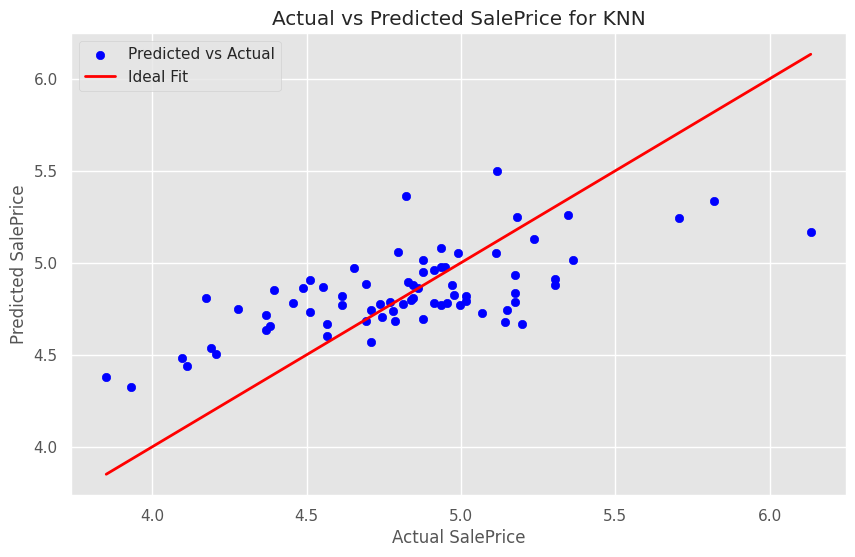

In [337]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN: ", knn_cv.best_params_)
print("Best score for KNN: ", knn_cv.best_score_)
print("Best RMSE for KNN: ", np.sqrt(-1 * knn_cv.best_score_))

# Get the best estimator
best_knn = knn_cv.best_estimator_

# Predict on training data
y_train_pred = best_knn.predict(X_train)

# Predict on test data
y_test_pred = best_knn.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for KNN:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for KNN:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for KNN')
plt.legend()
plt.show()


## SVM model

Best parameters for SVM:  {'C': 1.9182496720710063, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM:  -0.020671838231941637
Best RMSE for SVM:  0.14377704348031933

Training Data Metrics for SVM:
Mean Absolute Error:  0.06852423707411469
Mean Squared Error:  0.010372811368219223
Root Mean Squared Error:  0.10184699979979392
R2 Score:  0.9343830229239433

Test Data Metrics for SVM:
Mean Absolute Error:  0.09333794922545542
Mean Squared Error:  0.027717500722700086
Root Mean Squared Error:  0.16648573729512112
R2 Score:  0.8308676716175496


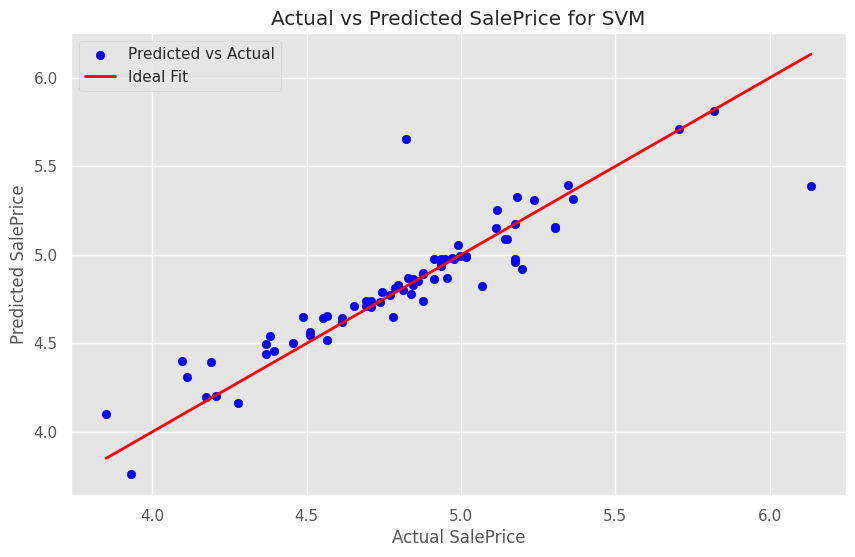

In [338]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Define the SVM model
svm = SVR()

# Define the parameter distributions for RandomizedSearchCV
param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10)),
    'degree': [3, 4, 5]
}

# Initialize RandomizedSearchCV
svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
svm_random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for SVM: ", svm_random_search.best_params_)
print("Best score for SVM: ", svm_random_search.best_score_)
print("Best RMSE for SVM: ", np.sqrt(-1 * svm_random_search.best_score_))

# Get the best estimator
best_svm = svm_random_search.best_estimator_

# Predict on training data
y_train_pred = best_svm.predict(X_train)

# Predict on test data
y_test_pred = best_svm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for SVM:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for SVM:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for SVM')
plt.legend()
plt.show()


## Decision Tree model

Best parameters for Decision Tree:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20}
Best score for Decision Tree:  -0.08440850530260896
Best RMSE for Decision Tree:  0.2905314187873817

Training Data Metrics for Decision Tree:
Mean Absolute Error:  0.16527153392127203
Mean Squared Error:  0.046926804330654
Root Mean Squared Error:  0.2166259548868833
R2 Score:  0.7031474944727785

Test Data Metrics for Decision Tree:
Mean Absolute Error:  0.25202334500906576
Mean Squared Error:  0.11052788025456244
Root Mean Squared Error:  0.33245733599149596
R2 Score:  0.3255583205118876


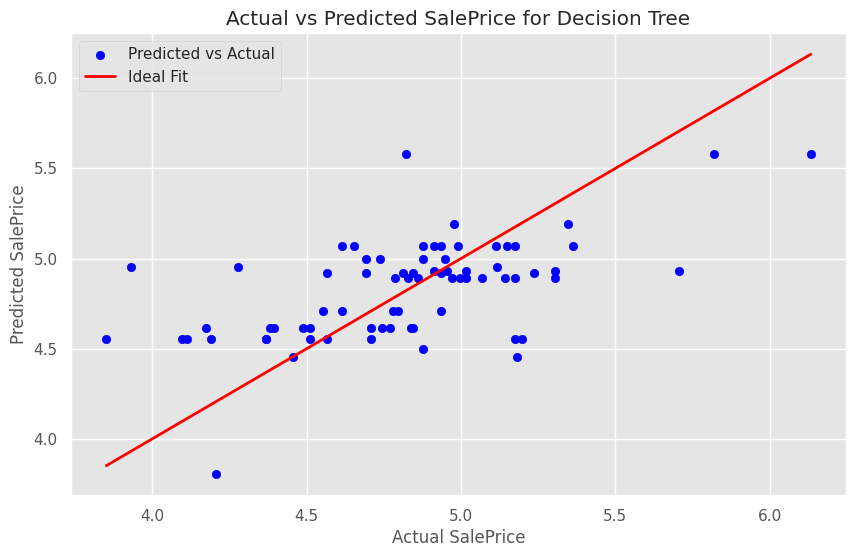

In [339]:
from sklearn.tree import DecisionTreeRegressor


# Define the Decision Tree model
dt = DecisionTreeRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree: ", dt_cv.best_params_)
print("Best score for Decision Tree: ", dt_cv.best_score_)
print("Best RMSE for Decision Tree: ", np.sqrt(-1 * dt_cv.best_score_))

# Get the best estimator
best_dt = dt_cv.best_estimator_

# Predict on training data
y_train_pred = best_dt.predict(X_train)

# Predict on test data
y_test_pred = best_dt.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Decision Tree:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Decision Tree')
plt.legend()
plt.show()


## ElasticNet model

Best parameters for ElasticNet:  {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000}
Best score for ElasticNet:  -0.07279295245738651
Best RMSE for ElasticNet:  0.26980169098318585

Training Data Metrics for ElasticNet:
Mean Absolute Error:  0.1993651188430568
Mean Squared Error:  0.06845663412502248
Root Mean Squared Error:  0.2616421872042475
R2 Score:  0.5669527544048298

Test Data Metrics for ElasticNet:
Mean Absolute Error:  0.21370875521764582
Mean Squared Error:  0.07444311054616723
Root Mean Squared Error:  0.27284264796062807
R2 Score:  0.5457477661976264


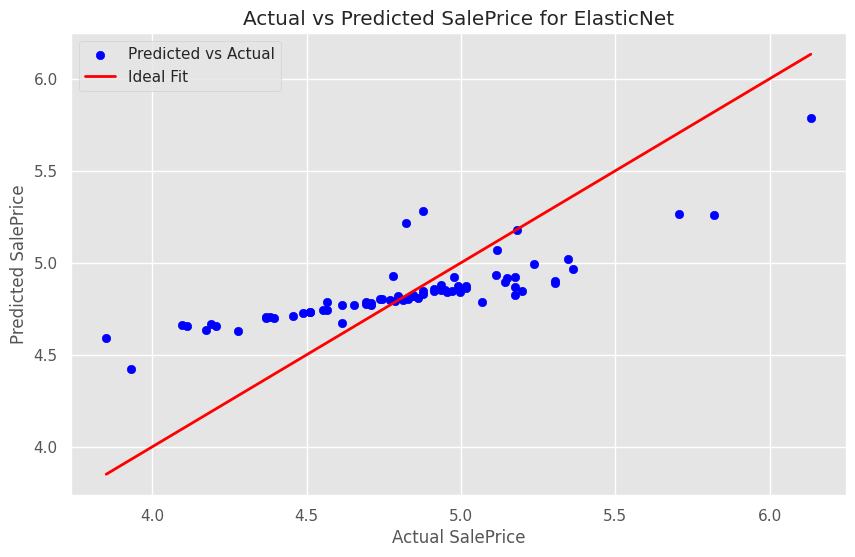

In [340]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the ElasticNet model
elasticnet = ElasticNet(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000, 3000]
}
en_cv = GridSearchCV(elasticnet, param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
en_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for ElasticNet: ", en_cv.best_params_)
print("Best score for ElasticNet: ", en_cv.best_score_)
print("Best RMSE for ElasticNet: ", np.sqrt(-1 * en_cv.best_score_))

# Get the best estimator
best_en = en_cv.best_estimator_

# Predict on training data
y_train_pred = best_en.predict(X_train)

# Predict on test data
y_test_pred = best_en.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for ElasticNet:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for ElasticNet')
plt.legend()
plt.show()


## Bayesian Ridge model

Best parameters for Bayesian Ridge:  {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06, 'n_iter': 100}
Best score for Bayesian Ridge:  -0.12006289156256396
Best RMSE for Bayesian Ridge:  0.34650092577446884

Training Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.16150649119313418
Mean Squared Error:  0.05040799645193288
Root Mean Squared Error:  0.22451725201403316
R2 Score:  0.6811259522398629

Test Data Metrics for Bayesian Ridge:
Mean Absolute Error:  0.1716139353474616
Mean Squared Error:  0.05370787229106424
Root Mean Squared Error:  0.23174958962437073
R2 Score:  0.6722742939944948


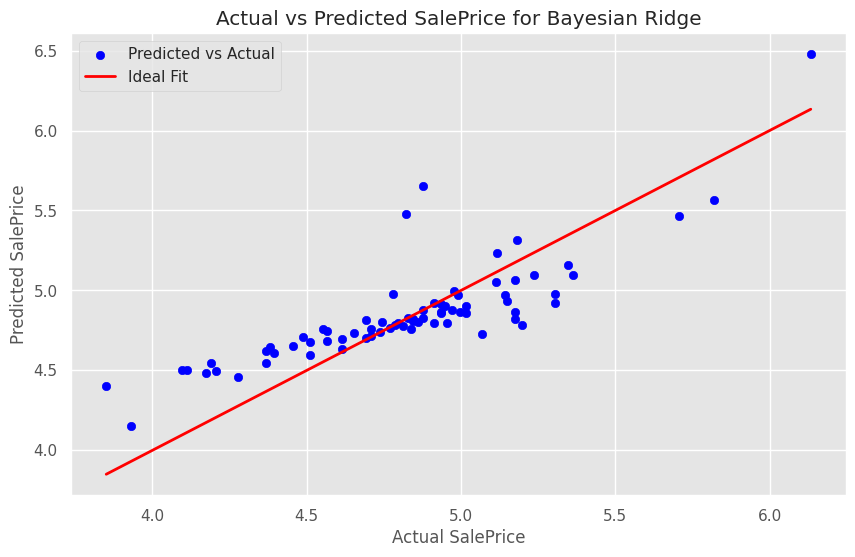

In [341]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the parameter grid for GridSearchCV
param_grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'n_iter': [100, 200, 300]
}
br_cv = GridSearchCV(bayesian_ridge, param_grid_br, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
br_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Bayesian Ridge: ", br_cv.best_params_)
print("Best score for Bayesian Ridge: ", br_cv.best_score_)
print("Best RMSE for Bayesian Ridge: ", np.sqrt(-1 * br_cv.best_score_))

# Get the best estimator
best_br = br_cv.best_estimator_

# Predict on training data
y_train_pred = best_br.predict(X_train)

# Predict on test data
y_test_pred = best_br.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for Bayesian Ridge:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Bayesian Ridge')
plt.legend()
plt.show()


## AdaBoost Regressor model

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 100}
Best score for AdaBoost:  -0.043523647999497796
Best RMSE for AdaBoost:  0.208623220182936

Training Data Metrics for AdaBoost:
Mean Absolute Error:  0.10280930868975083
Mean Squared Error:  0.01657683289184662
Root Mean Squared Error:  0.1287510500611417
R2 Score:  0.8951372366424648

Test Data Metrics for AdaBoost:
Mean Absolute Error:  0.1433855473095645
Mean Squared Error:  0.040590416026085846
Root Mean Squared Error:  0.20147063316048283
R2 Score:  0.7523170778928921


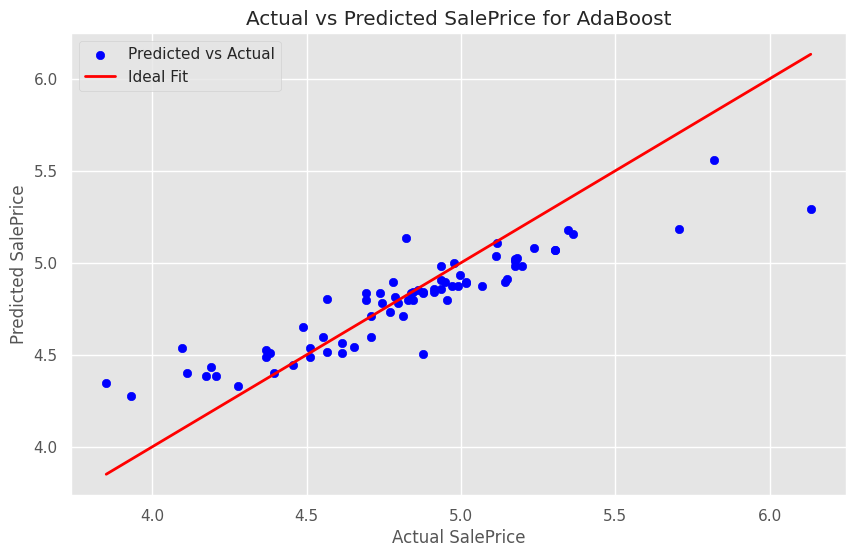

In [342]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the AdaBoost Regressor model
ada = AdaBoostRegressor(random_state=13)

# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_cv = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for AdaBoost: ", ada_cv.best_params_)
print("Best score for AdaBoost: ", ada_cv.best_score_)
print("Best RMSE for AdaBoost: ", np.sqrt(-1 * ada_cv.best_score_))

# Get the best estimator
best_ada = ada_cv.best_estimator_

# Predict on training data
y_train_pred = best_ada.predict(X_train)

# Predict on test data
y_test_pred = best_ada.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics for AdaBoost:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for AdaBoost')
plt.legend()
plt.show()


## Random Forest Regressor

Best parameters:  {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}
Best score:  -0.025377409862108746
Best RMSE:  0.15930288717442864

Training Data Metrics:
Mean Absolute Error:  0.029055791437304555
Mean Squared Error:  0.003498524124903765
Root Mean Squared Error:  0.05914832309460485
R2 Score:  0.977868817897606

Test Data Metrics:
Mean Absolute Error:  0.07000500683576001
Mean Squared Error:  0.015048145471408631
Root Mean Squared Error:  0.12267088273673028
R2 Score:  0.9081761408836995


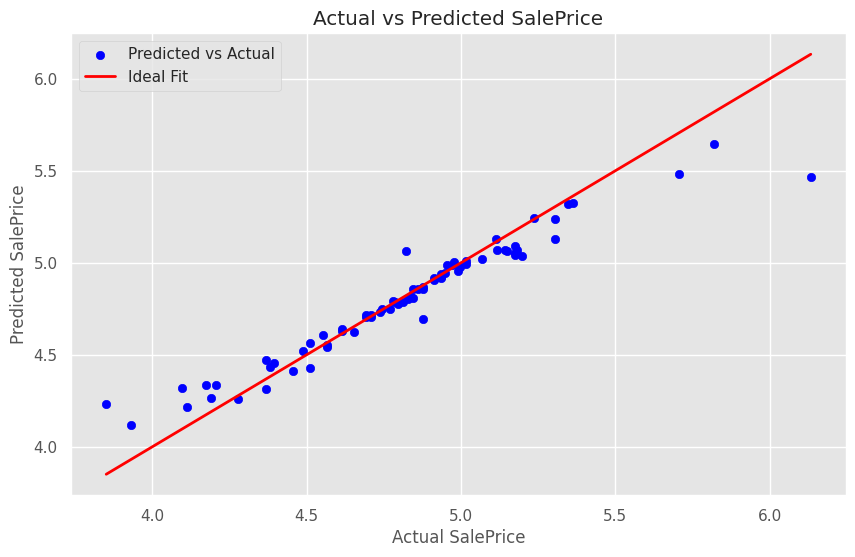

In [343]:
RFR = RandomForestRegressor(random_state=13)

# Define the parameter grid for GridSearchCV for hyper parametr tuning
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500 , 1000],
    'min_samples_split': [3, 5, 10]
}
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", rfr_cv.best_params_)
print("Best score: ", rfr_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * rfr_cv.best_score_))

# Get the best estimator
best_rfr = rfr_cv.best_estimator_

# Predict on training data
y_train_pred = best_rfr.predict(X_train)

# Predict on test data
y_test_pred = best_rfr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



## XGB Regressor

Best parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best score:  -0.0194123002982956
Best RMSE:  0.13932803127258922

Training Data Metrics:
Mean Absolute Error:  0.008939588713298063
Mean Squared Error:  0.00013065435846973918
Root Mean Squared Error:  0.011430413748843004
R2 Score:  0.9991734985106484

Test Data Metrics:
Mean Absolute Error:  0.06054998115126746
Mean Squared Error:  0.011888969400639555
Root Mean Squared Error:  0.10903655075542125
R2 Score:  0.9274534491072977


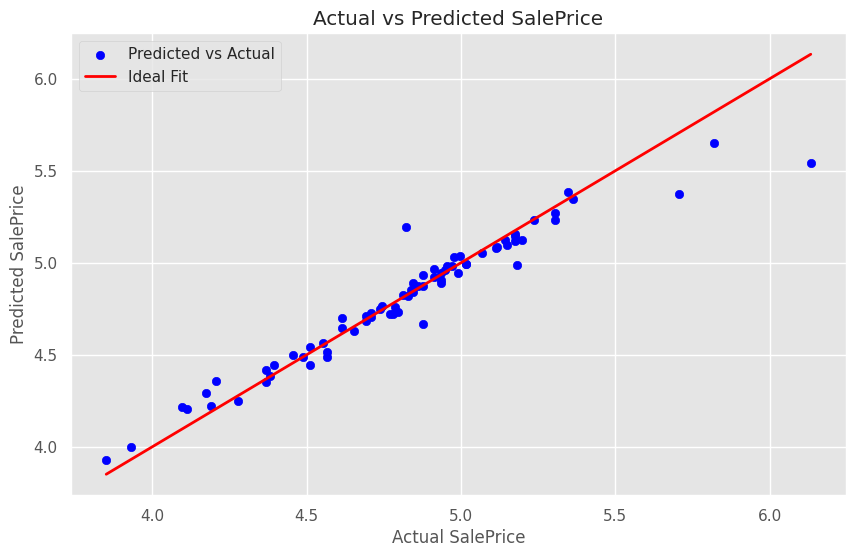

In [344]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", xgb_cv.best_params_)
print("Best score: ", xgb_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * xgb_cv.best_score_))

# Get the best estimator
best_xgb = xgb_cv.best_estimator_

# Predict on training data
y_train_pred = best_xgb.predict(X_train)

# Predict on test data
y_test_pred = best_xgb.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## Ridge regressor

Best parameters:  {'alpha': 10, 'solver': 'sparse_cg'}
Best score:  -0.09310892965926403
Best RMSE:  0.30513755858508146

Training Data Metrics:
Mean Absolute Error:  0.16479257688255786
Mean Squared Error:  0.05069446716899611
Root Mean Squared Error:  0.22515431856616944
R2 Score:  0.6793137779114942

Test Data Metrics:
Mean Absolute Error:  0.17479988700651836
Mean Squared Error:  0.054421106318295095
Root Mean Squared Error:  0.23328331770252045
R2 Score:  0.6679221363842542


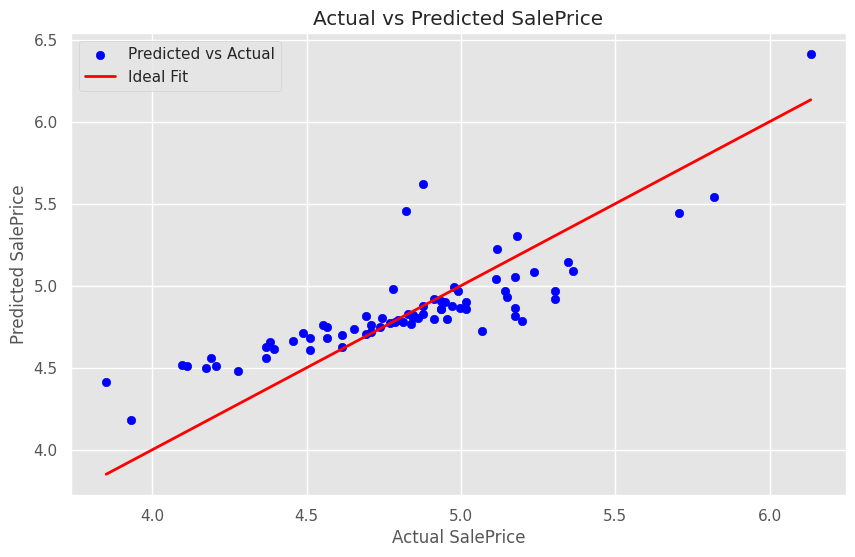

In [345]:
# Initialize the Ridge regressor
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

# Perform GridSearchCV
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * ridge_cv.best_score_))
# Get the best estimator
best_ridge = ridge_cv.best_estimator_

# Predict on training data
y_train_pred = best_ridge.predict(X_train)

# Predict on test data
y_test_pred = best_ridge.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()



# Ensemble Learning

## Gradient Boosting Regressor

Best parameters:  {'learning_rate': 0.01, 'max_depth': 12, 'max_features': 0.7, 'min_samples_leaf': 10, 'n_estimators': 500}
Best score:  -0.024730440090270034
Best RMSE:  0.15725914946441125

Training Data Metrics:
Mean Absolute Error:  0.035911697980558696
Mean Squared Error:  0.008977900304392451
Root Mean Squared Error:  0.09475178259216262
R2 Score:  0.9432070383281657

Test Data Metrics:
Mean Absolute Error:  0.06764477893690289
Mean Squared Error:  0.016089284817417733
Root Mean Squared Error:  0.12684354464227862
R2 Score:  0.9018231033741925


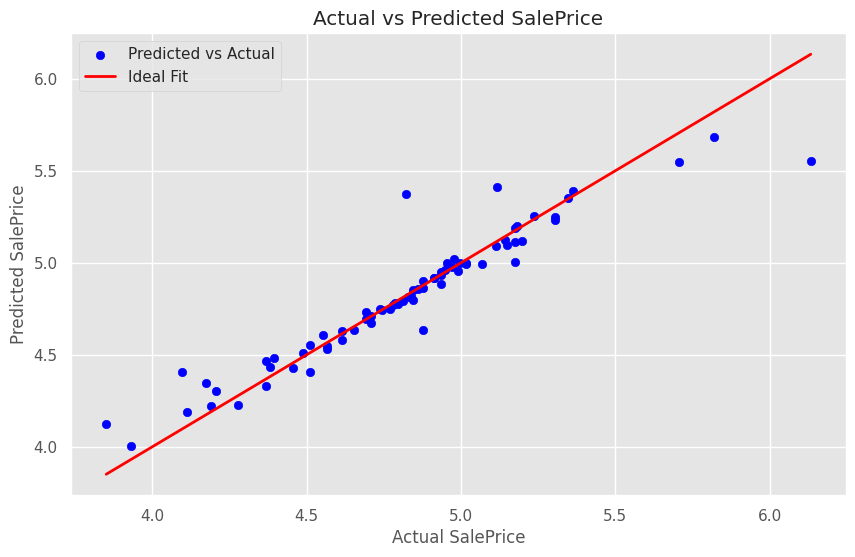

In [346]:
# Initialize the GradientBoostingRegressor
GBR = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 500],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

# Perform GridSearchCV
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", GBR_cv.best_params_)
print("Best score: ", GBR_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * GBR_cv.best_score_))

# Get the best estimator
best_gbr = GBR_cv.best_estimator_

# Predict on training data
y_train_pred = best_gbr.predict(X_train)

# Predict on test data
y_test_pred = best_gbr.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## LGBM Regressor (LightGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 12
[LightGBM] [Info] Start training from score 4.824472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

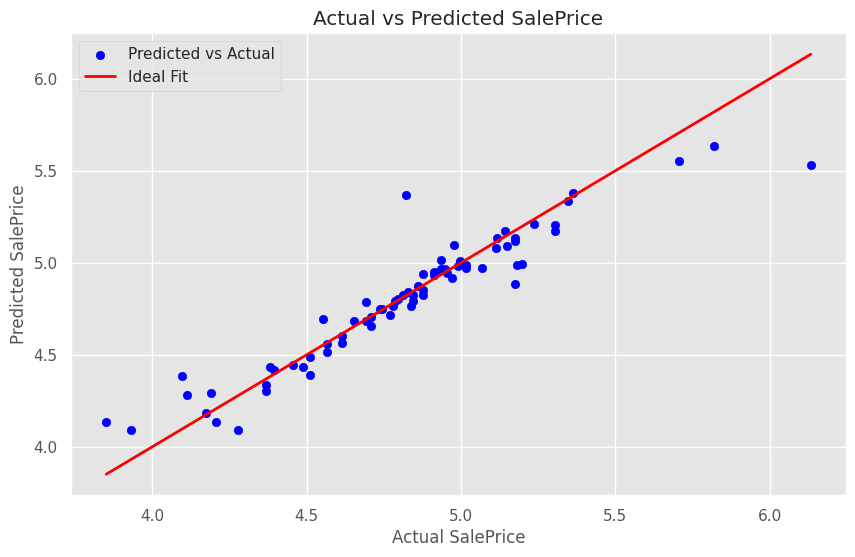

In [356]:
# Initialize the LGBMRegressor
lgbm_regressor = lgb.LGBMRegressor()

# Define the parameter grid for GridSearchCV
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", lgbm_cv.best_params_)
print("Best score: ", lgbm_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * lgbm_cv.best_score_))

# Get the best estimator
best_lgbm = lgbm_cv.best_estimator_

# Predict on training data
y_train_pred = best_lgbm.predict(X_train)

# Predict on test data
y_test_pred = best_lgbm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## CatBoost Regressor

Best parameters:  {'depth': 4, 'iterations': 700, 'learning_rate': 0.05}
Best score:  -0.020456162835551284
Best RMSE:  0.14302504268676616

Training Data Metrics:
Mean Absolute Error:  0.010345545406096605
Mean Squared Error:  0.00017089723341897714
Root Mean Squared Error:  0.013072766861647045
R2 Score:  0.99891892762246

Test Data Metrics:
Mean Absolute Error:  0.05901232572350869
Mean Squared Error:  0.018467436619398064
Root Mean Squared Error:  0.13589494699729665
R2 Score:  0.887311609154714


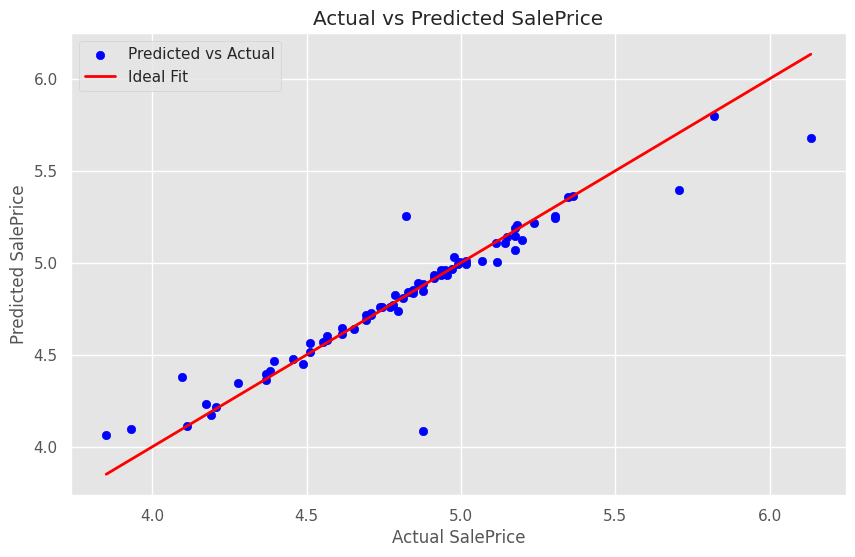

In [348]:
# Initialize the CatBoostRegressor
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

# Define the parameter grid for GridSearchCV
param_grid_cat = {
    'iterations': [100, 500, 700],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

# Perform GridSearchCV
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cat_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", cat_cv.best_params_)
print("Best score: ", cat_cv.best_score_)
print("Best RMSE: ", np.sqrt(-1 * cat_cv.best_score_))
# Get the best estimator
best_catboost = cat_cv.best_estimator_

# Predict on training data
y_train_pred = best_catboost.predict(X_train)

# Predict on test data
y_test_pred = best_catboost.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## VotingRegressor


Training Data Metrics:
Mean Absolute Error:  0.03217371197488976
Mean Squared Error:  0.002312298562105659
Root Mean Squared Error:  0.048086365657072264
R2 Score:  0.9853727175442955

Test Data Metrics:
Mean Absolute Error:  0.06742808508224782
Mean Squared Error:  0.012168574189049604
Root Mean Squared Error:  0.11031126048164622
R2 Score:  0.9257472992865116


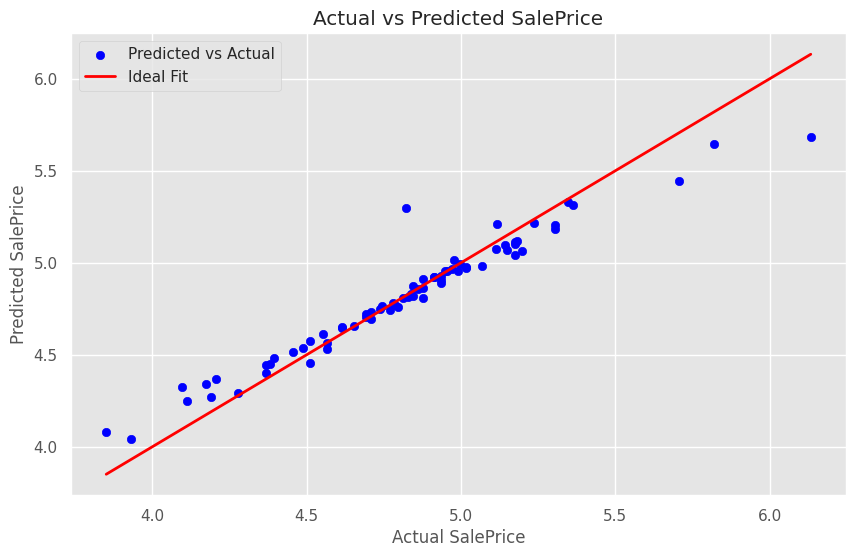

In [349]:
# Initialize the VotingRegressor with the best estimators and weights
vr = VotingRegressor([
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights=[2, 3, 1])

# Fit the model on training data
vr.fit(X_train, y_train)

# Predict on test data
y_pred_vr = vr.predict(X_test)
# Predict on training data
y_train_pred_vr = vr.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_vr)
train_mse = mean_squared_error(y_train, y_train_pred_vr)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_vr)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_vr)
test_mse = mean_squared_error(y_test, y_pred_vr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_vr)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_vr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


## Stacking Regressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 12
[LightGBM] [Info] Start training from score 4.824472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

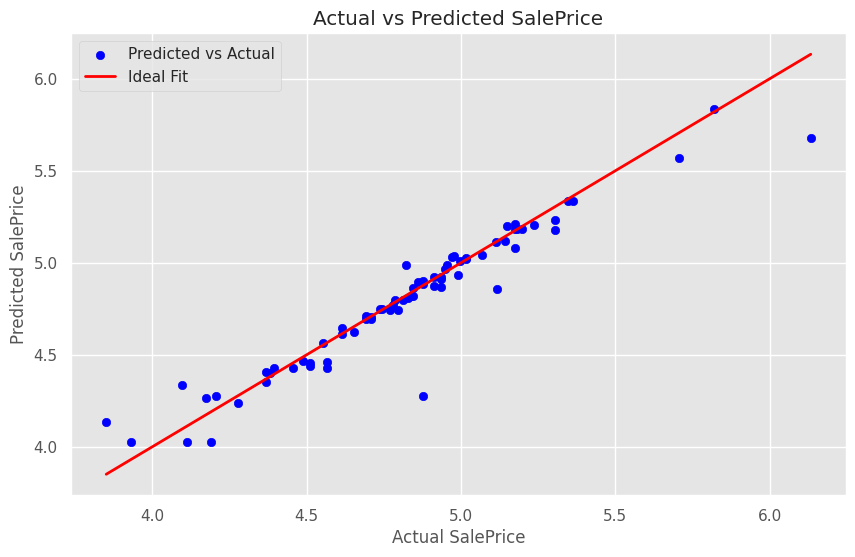

In [357]:
# Define the list of base estimators
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

# Initialize the StackingRegressor with VotingRegressor as the final estimator
stackreg = StackingRegressor(
    estimators=estimators,
    final_estimator=vr
)

# Fit the model on training data
stackreg.fit(X_train, y_train)

# Predict on test data
y_pred_stackreg = stackreg.predict(X_test)
# Predict on training data
y_train_pred_stackreg = stackreg.predict(X_train)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred_stackreg)
train_mse = mean_squared_error(y_train, y_train_pred_stackreg)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_stackreg)

print("\nTraining Data Metrics:")
print("Mean Absolute Error: ", train_mae)
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2 Score: ", train_r2)

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_pred_stackreg)
test_mse = mean_squared_error(y_test, y_pred_stackreg)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_stackreg)

print("\nTest Data Metrics:")
print("Mean Absolute Error: ", test_mae)
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2 Score: ", test_r2)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stackreg, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()


# Overall calculate matrix

In [358]:
# Define a function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

# Initialize models
models = {
    'Linear Regression': lr,
    'Decision Tree': dt_cv.best_estimator_,
    'Random Forest': rfr_cv.best_estimator_,
    'K-Nearest Neighbors': knn_cv.best_estimator_,
    'Support Vector Machine':svm_random_search.best_estimator_,
    'Gradient Boosting': GBR_cv.best_estimator_,
    'XGBoost': xgb_cv.best_estimator_,
    'Ridge': ridge_cv.best_estimator_,
    'ElasticNet': en_cv.best_estimator_,
    'Bayesian Ridge': br_cv.best_estimator_,
    'AdaBoost': ada_cv.best_estimator_,
    'LGBM': lgbm_cv.best_estimator_,
    'CatBoost': cat_cv.best_estimator_,
    'Stacking Regressor': stackreg
}

# Create a DataFrame to store results
results = []

# Evaluate each model
for name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, **metrics})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)


                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  1.601458e-01  5.038066e-02  2.244564e-01   
1            Decision Tree  1.652715e-01  4.692680e-02  2.166260e-01   
2            Random Forest  2.905579e-02  3.498524e-03  5.914832e-02   
3      K-Nearest Neighbors  1.129804e-09  1.353811e-16  1.163534e-08   
4   Support Vector Machine  6.852424e-02  1.037281e-02  1.018470e-01   
5        Gradient Boosting  3.591170e-02  8.977900e-03  9.475178e-02   
6                  XGBoost  8.939589e-03  1.306544e-04  1.143041e-02   
7                    Ridge  1.647926e-01  5.069447e-02  2.251543e-01   
8               ElasticNet  1.993651e-01  6.845663e-02  2.616422e-01   
9           Bayesian Ridge  1.615065e-01  5.040800e-02  2.245173e-01   
10                AdaBoost  1.028093e-01  1.657683e-02  1.287511e-01   
11                    LGBM  5.294760e-02  1.171683e-02  1.082443e-01   
12                CatBoost  1.034555e-02  1.708972e-04  1.307277

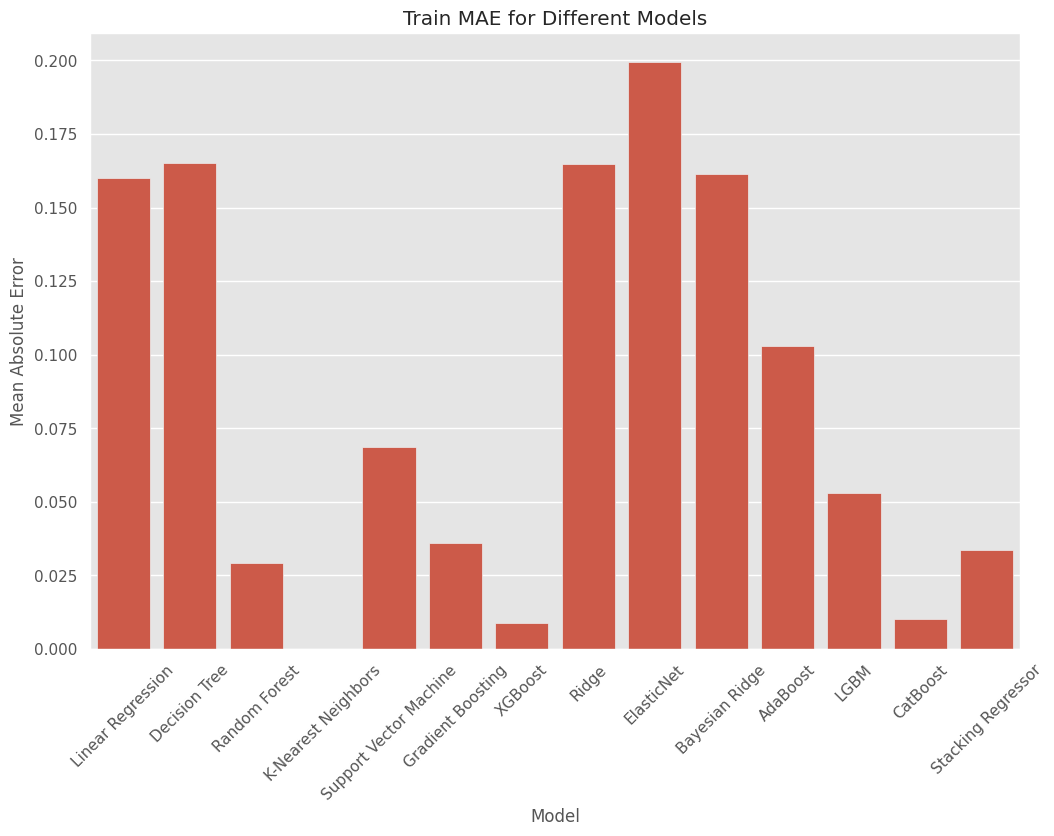

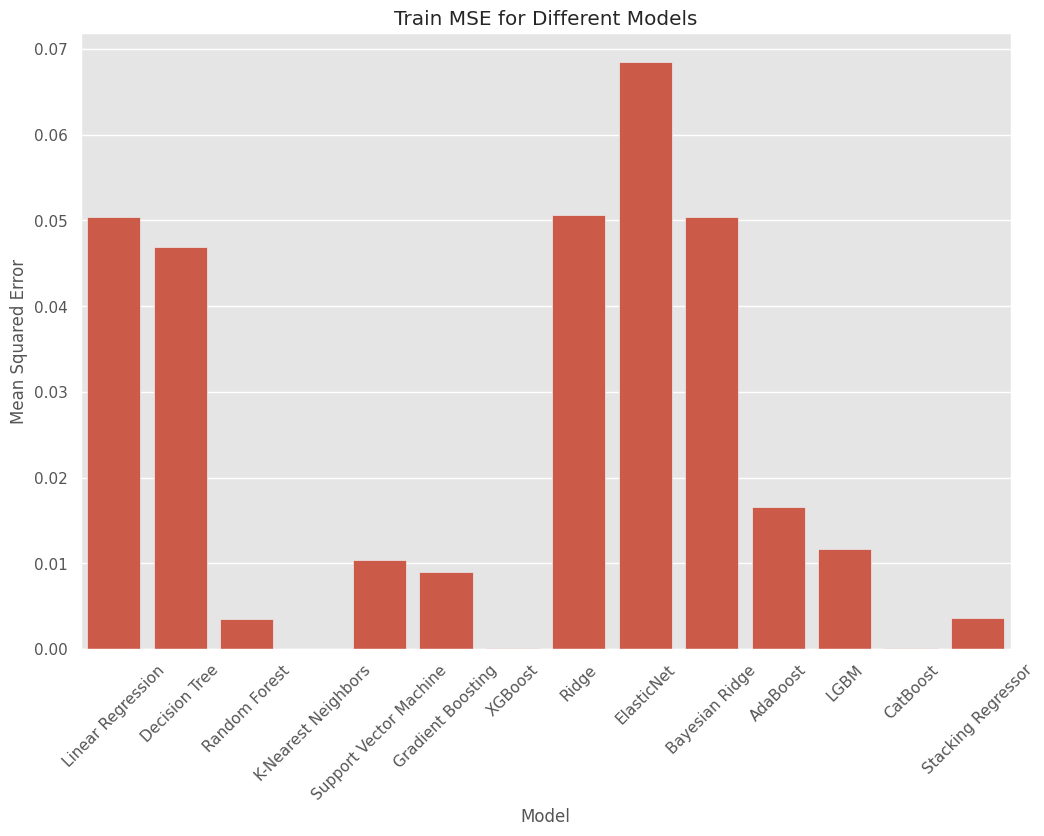

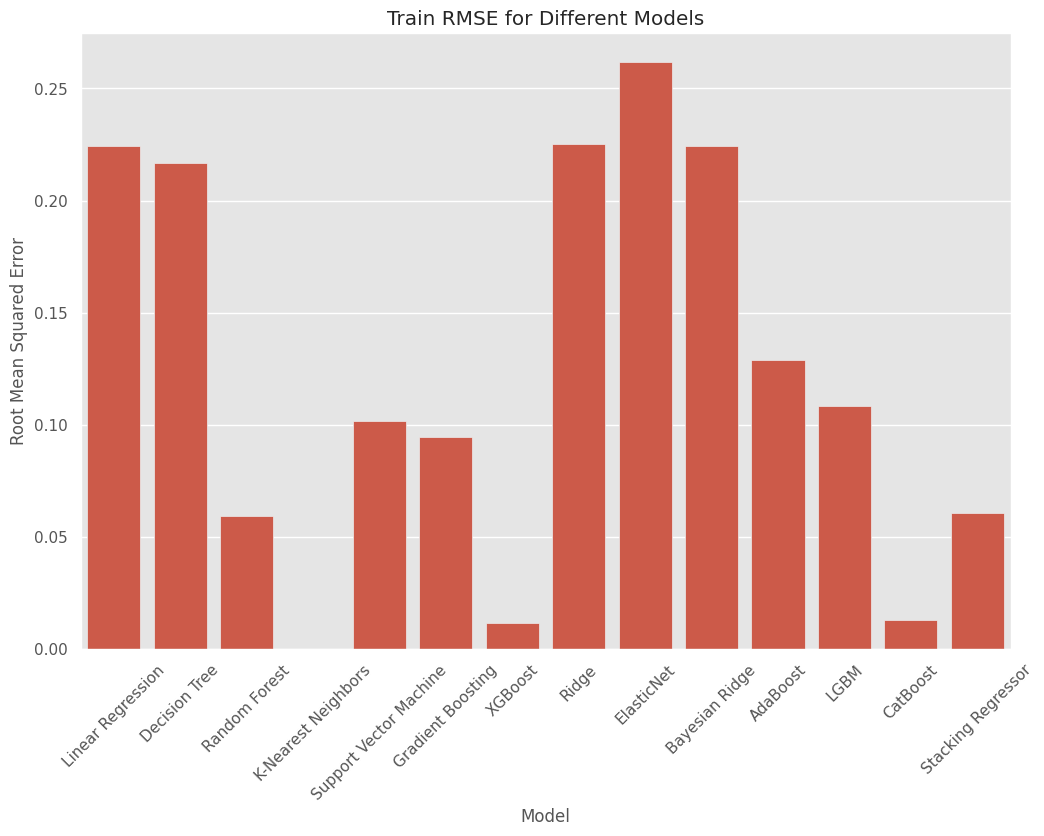

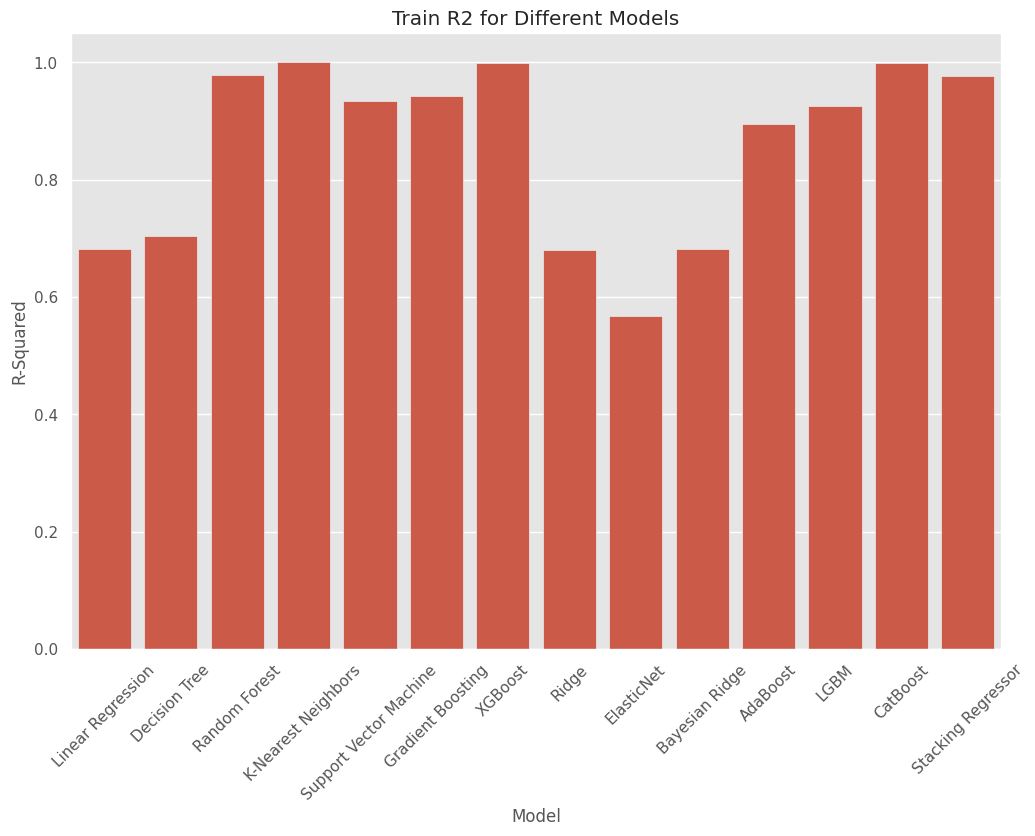

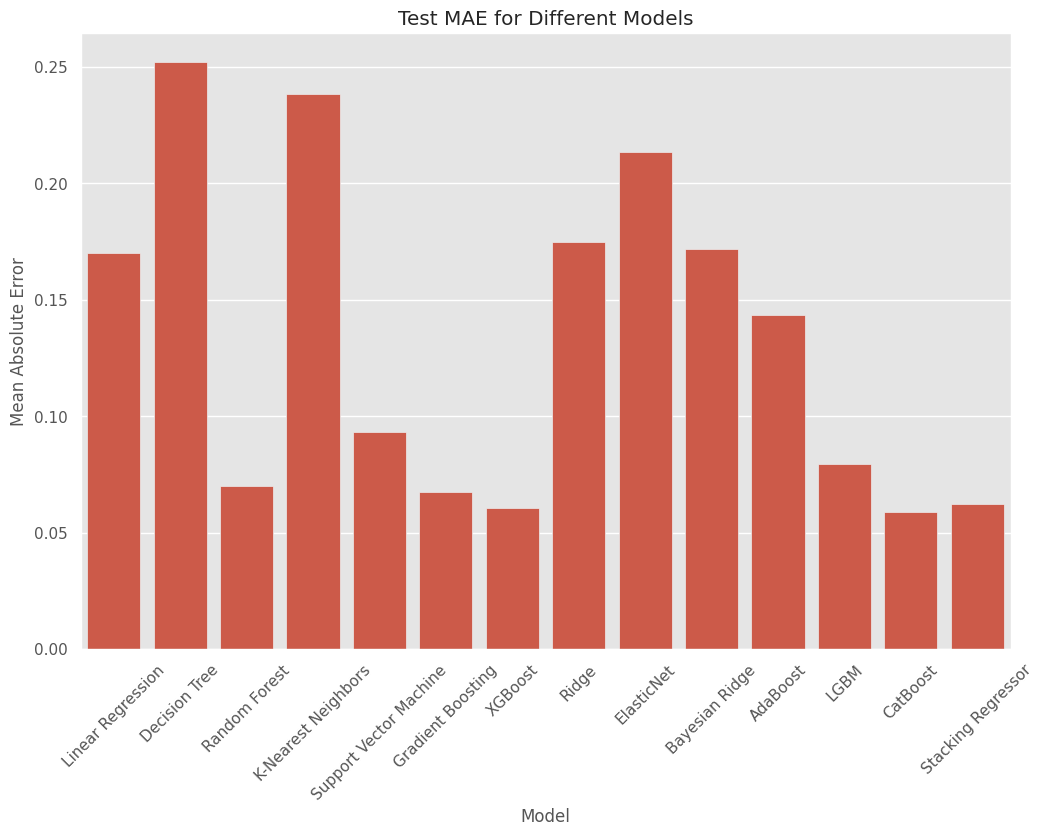

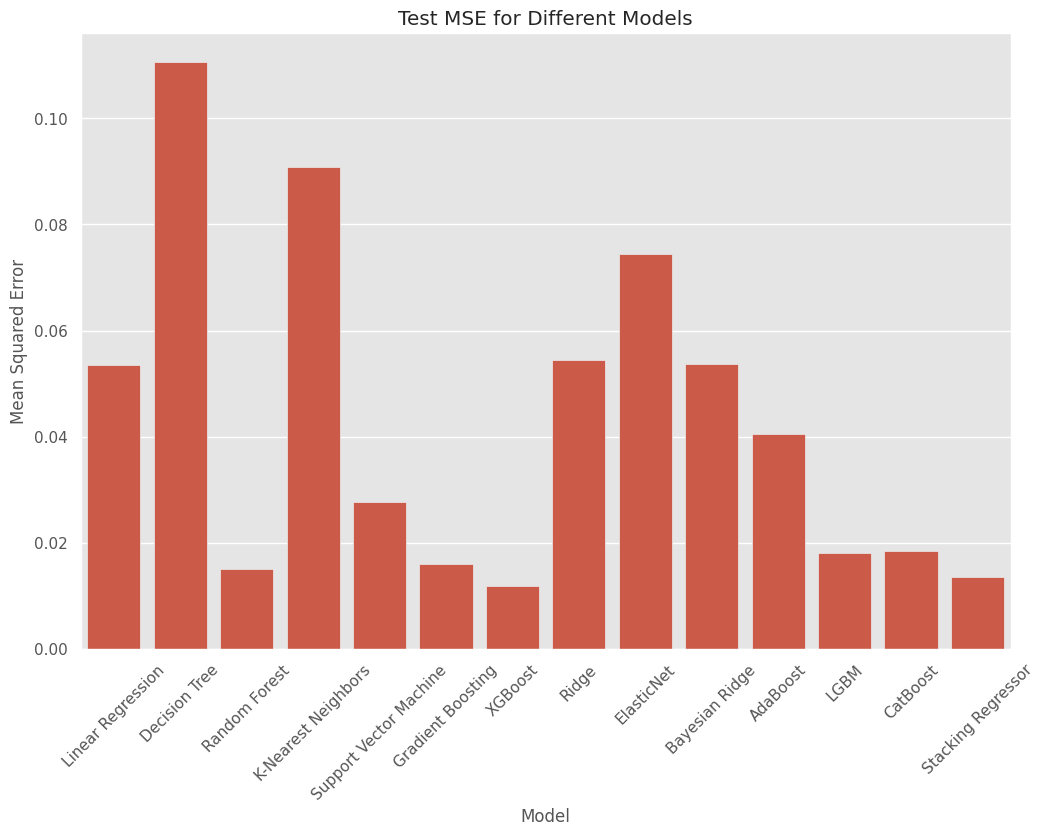

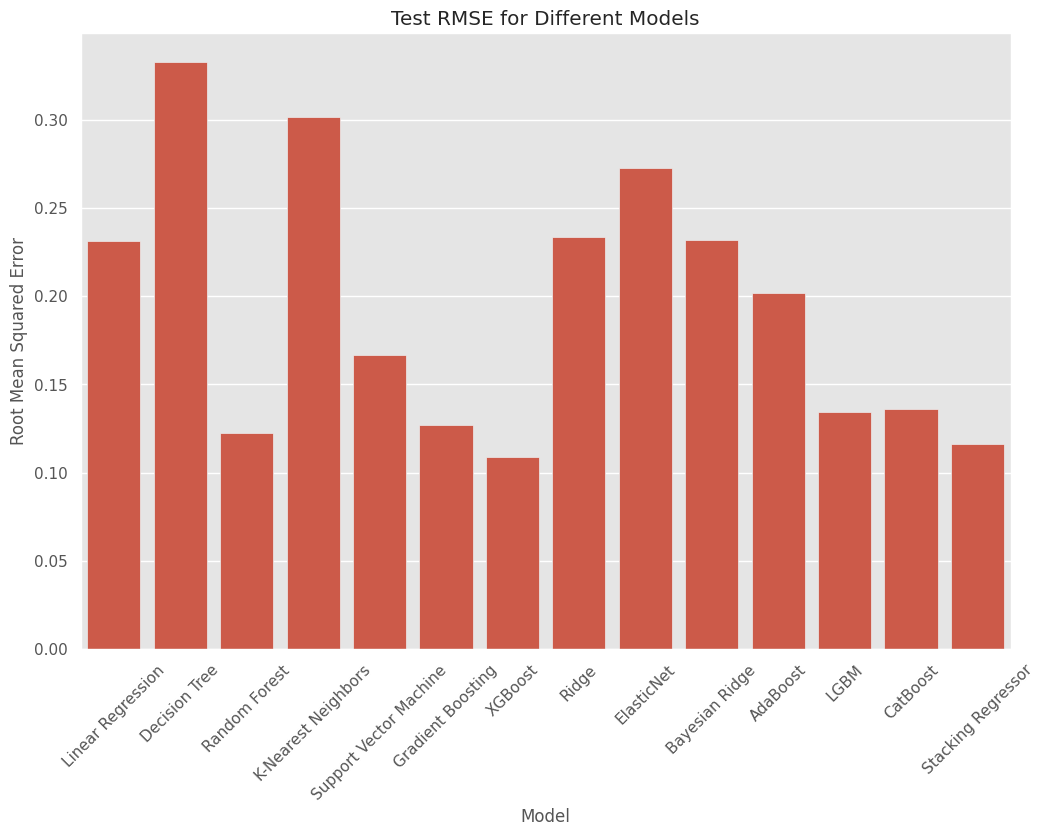

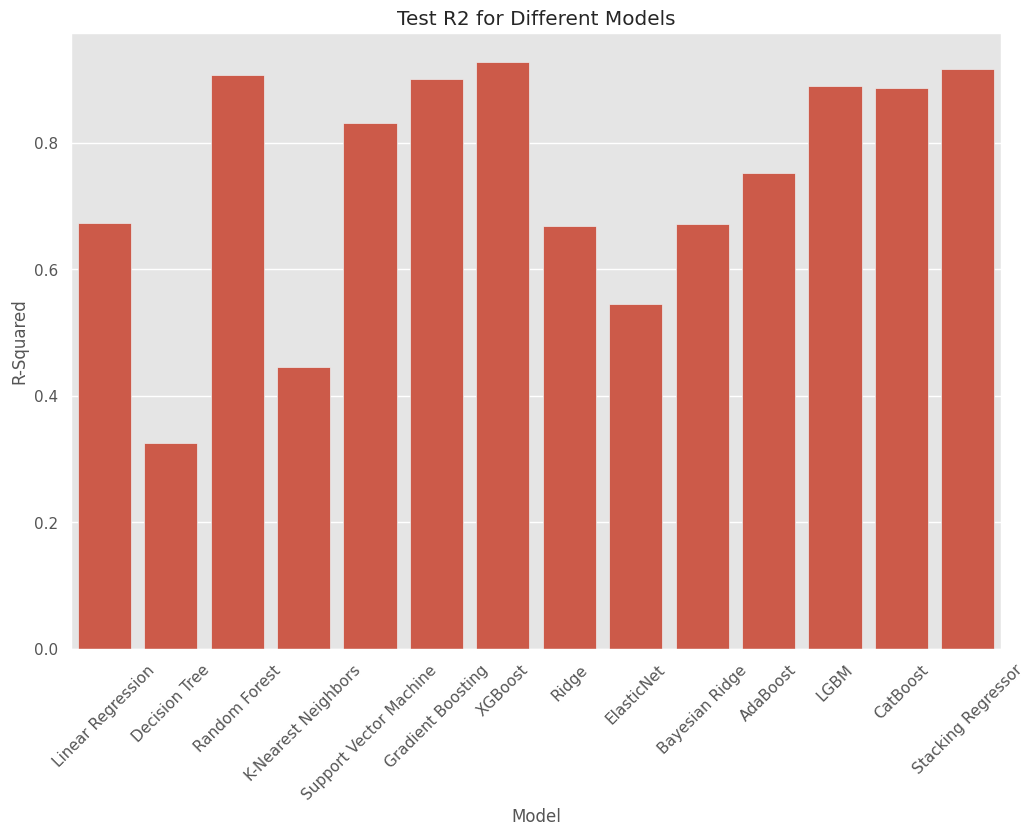

                     Model     Train MAE     Train MSE    Train RMSE  \
0        Linear Regression  1.601458e-01  5.038066e-02  2.244564e-01   
1            Decision Tree  1.652715e-01  4.692680e-02  2.166260e-01   
2            Random Forest  2.905579e-02  3.498524e-03  5.914832e-02   
3      K-Nearest Neighbors  1.129804e-09  1.353811e-16  1.163534e-08   
4   Support Vector Machine  6.852424e-02  1.037281e-02  1.018470e-01   
5        Gradient Boosting  3.591170e-02  8.977900e-03  9.475178e-02   
6                  XGBoost  8.939589e-03  1.306544e-04  1.143041e-02   
7                    Ridge  1.647926e-01  5.069447e-02  2.251543e-01   
8               ElasticNet  1.993651e-01  6.845663e-02  2.616422e-01   
9           Bayesian Ridge  1.615065e-01  5.040800e-02  2.245173e-01   
10                AdaBoost  1.028093e-01  1.657683e-02  1.287511e-01   
11                    LGBM  5.294760e-02  1.171683e-02  1.082443e-01   
12                CatBoost  1.034555e-02  1.708972e-04  1.307277

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the metrics
def plot_metrics(df, metric, title, ylabel):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y=metric, data=df)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Plot metrics for training data
plot_metrics(results_df, 'Train MAE', 'Train MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Train MSE', 'Train MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Train RMSE', 'Train RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Train R2', 'Train R2 for Different Models', 'R-Squared')

# Plot metrics for test data
plot_metrics(results_df, 'Test MAE', 'Test MAE for Different Models', 'Mean Absolute Error')
plot_metrics(results_df, 'Test MSE', 'Test MSE for Different Models', 'Mean Squared Error')
plot_metrics(results_df, 'Test RMSE', 'Test RMSE for Different Models', 'Root Mean Squared Error')
plot_metrics(results_df, 'Test R2', 'Test R2 for Different Models', 'R-Squared')

# Print the results DataFrame for reference
print(results_df)


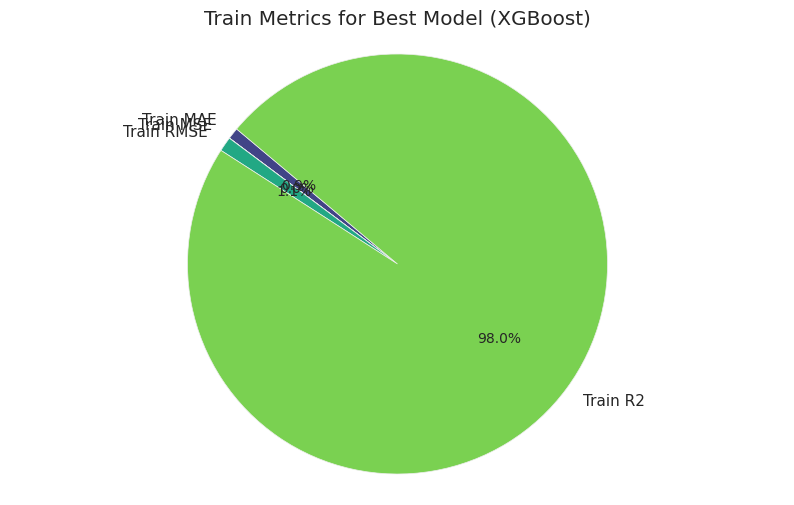

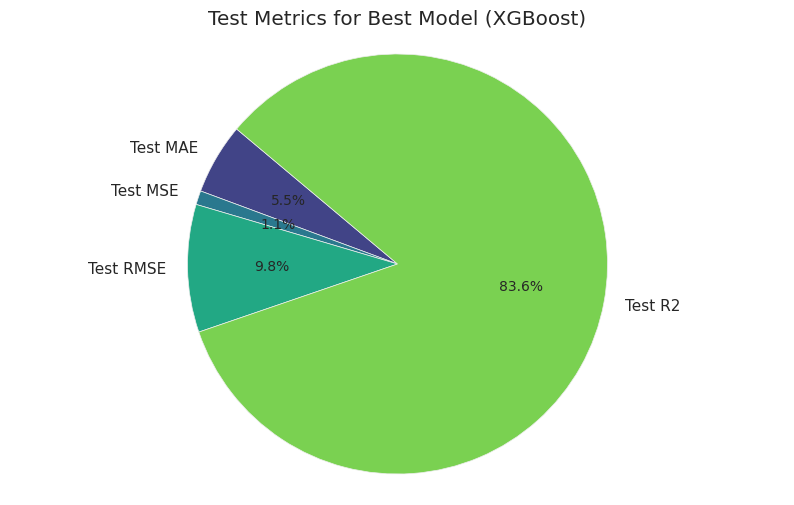

In [360]:
# Pie charts for the best model metrics (assuming the best model is the one with the lowest Test RMSE)
best_model = results_df.loc[results_df['Test RMSE'].idxmin()]

# Pie chart for Train Metrics
train_metrics = best_model[['Train MAE', 'Train MSE', 'Train RMSE', 'Train R2']]
plt.figure(figsize=(10, 6))
plt.pie(train_metrics, labels=train_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(train_metrics)))
plt.title(f'Train Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for Test Metrics
test_metrics = best_model[['Test MAE', 'Test MSE', 'Test RMSE', 'Test R2']]
plt.figure(figsize=(10, 6))
plt.pie(test_metrics, labels=test_metrics.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(test_metrics)))
plt.title(f'Test Metrics for Best Model ({best_model["Model"]})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [362]:
# Assuming `pipeline` is your preprocessing pipeline and `stackreg` is your trained StackingRegressor

# Step 1: Preprocess the test data
df_test_preprocess = pipeline.transform(test_df)

# Step 2: Predict using the StackingRegressor
y_stacking = stackreg.predict(df_test_preprocess)

# Step 3: Reverse the log transformation if applied during training
# Apply exponential to revert log transformation
y_stacking = np.exp(y_stacking)

# Step 4: Create the output DataFrame
# Ensure to copy to avoid setting with copy warning
df_y_stacking_out = test_df[['Loan_ID']].copy()  # Use the correct column name for the identifier

# Add 'LP00' prefix to each Loan_ID
df_y_stacking_out['Loan_ID'] = df_y_stacking_out['Loan_ID'].apply(lambda x: 'LP00' + str(x))

# Step 5: Add predictions to the DataFrame
df_y_stacking_out['LoanAmount'] = y_stacking

# Step 6: Save to CSV
df_y_stacking_out.to_csv('Milan_submission.csv', index=False)

print("Submission file created successfully.")


Submission file created successfully.


### **Model Performance Summary**

| Model                | Train MAE | Train MSE | Train RMSE | Train R² | Test MAE | Test MSE | Test RMSE | Test R² |
|----------------------|-----------|-----------|------------|----------|----------|----------|-----------|---------|
| Linear Regression   | 0.160146  | 0.050381  | 0.224457   | 0.681299 | 0.170297 | 0.053510 | 0.231321  | 0.673484 |
| Decision Tree        | 0.165272  | 0.046927  | 0.216626   | 0.703147 | 0.252023 | 0.110528 | 0.332457  | 0.325558 |
| Random Forest        | 0.029056  | 0.003499  | 0.059148   | 0.977869 | 0.070005 | 0.015048 | 0.122671  | 0.908176 |
| K-Nearest Neighbors  | 0.000000  | 0.000000  | 0.000000   | 1.000000 | 0.238449 | 0.090819 | 0.301361  | 0.445824 |
| Support Vector Machine | 0.068524 | 0.010373  | 0.101847   | 0.934383 | 0.093338 | 0.027718 | 0.166486  | 0.830868 |
| Gradient Boosting    | 0.035912  | 0.008978  | 0.094752   | 0.943207 | 0.067645 | 0.016089 | 0.126844  | 0.901823 |
| XGBoost              | 0.008940  | 0.000131  | 0.011430   | 0.999173 | 0.060550 | 0.011889 | 0.109037  | 0.927453 |
| Ridge                | 0.164793  | 0.050694  | 0.225154   | 0.679314 | 0.174800 | 0.054421 | 0.233283  | 0.667922 |
| ElasticNet           | 0.199365  | 0.068456  | 0.261642   | 0.566953 | 0.213709 | 0.074443 | 0.272843  | 0.545748 |
| Bayesian Ridge       | 0.161507  | 0.050408  | 0.224517   | 0.681126 | 0.171614 | 0.053708 | 0.231750  | 0.672274 |
| AdaBoost             | 0.102809  | 0.016577  | 0.128751   | 0.895137 | 0.143386 | 0.040590 | 0.201471  | 0.752317 |
| LGBM                 | 0.052948  | 0.011717  | 0.108244   | 0.925881 | 0.079484 | 0.018063 | 0.134397  | 0.889782 |
| CatBoost             | 0.010346  | 0.000171  | 0.013073   | 0.998919 | 0.059012 | 0.018467 | 0.135895  | 0.887312 |
| Stacking Regressor   | 0.033607  | 0.003659  | 0.060490   | 0.976854 | 0.062234 | 0.013505 | 0.116212  | 0.917591 |

### **Detailed Analysis**

1. **Best Models for Performance**:
   - **Train Metrics**:
     - **XGBoost** and **CatBoost** exhibit the lowest training errors (MAE, MSE, RMSE) and the highest training R² scores, indicating strong performance and minimal error on the training set.
     - **Stacking Regressor** also performs exceptionally well, particularly in terms of MAE and RMSE.
   - **Test Metrics**:
     - **CatBoost** and **Stacking Regressor** show the lowest test errors and highest R² scores, suggesting they generalize well to new data.
     - **XGBoost** follows closely, also demonstrating robust performance on the test set.

2. **Underperformance**:
   - **ElasticNet** and **Decision Tree** models have higher errors and lower R² scores on both training and testing sets. The ElasticNet shows particularly high errors, suggesting it may not be capturing the underlying patterns effectively.
   - **K-Nearest Neighbors (KNN)** exhibits perfect training performance (MAE, MSE, RMSE) but performs poorly on the test set, indicating possible overfitting or sensitivity to noise.

3. **Comparative Insights**:
   - **Gradient Boosting** and **AdaBoost** offer a good balance between training and test performance, though not as strong as **XGBoost** and **CatBoost**.
   - **Ridge** and **Bayesian Ridge** perform well but are not as competitive compared to the top performers like **CatBoost** and **Stacking Regressor**.

### **Conclusion**

- **CatBoost** and **Stacking Regressor** are the standout models, excelling both in training and test performance. They exhibit the lowest errors and highest R² scores, indicating their effectiveness and robustness.
- **XGBoost** also performs very well, with strong metrics in both training and test sets, making it a reliable alternative.
- **KNN** and **ElasticNet** may require additional tuning or preprocessing to improve their performance, as they show significant discrepancies between training and test results.

For the best model selection, **CatBoost** and **Stacking Regressor** are recommended based on their consistent performance across both training and test datasets.